 ## Exploratory Data Analysis

In [1]:
# importing some important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pd.pandas.set_option('display.max_columns',None)  ## This creates a slider bar which helps us show all the columns

In [2]:
# The dataset source url
url = 'https://drive.google.com/file/d/1KPfn0n1dPo89XylrqFaKSbVdhfUZ9Blq/view?usp=sharing'

# Path to download it and convert it into datafram
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# Reading the file
df = pd.read_csv(path)

In [3]:
df = pd.read_csv('airbnb prices.csv')

In [4]:
# Data
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [5]:
# import pandas_profiling
# import pandas_profiling
# Using pandas profiling to understand data quickly.
#df.profile_report(minimal=True)

In [6]:
# Shape
df.shape

(18723, 20)

In [7]:
# Data type of the columns
df.dtypes

room_id                   int64
survey_id                 int64
host_id                   int64
room_type                object
country                 float64
city                     object
borough                 float64
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
bathrooms               float64
price                   float64
minstay                 float64
name                     object
last_modified            object
latitude                float64
longitude               float64
location                 object
dtype: object

In [8]:
# Columns names
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [9]:
# Checking null values
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

#### Analysis - columns like country, borough, bathrooms, minstay has NaN values in all the rows/records.

In [10]:
# Droping the above mentioned columns as it has all null values.
df = df.drop(['country','borough','bathrooms','minstay'],axis=1)
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'city', 'neighborhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'name', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [11]:
# checking the survey_id and city column
print('survey :', df.survey_id.value_counts())
print('\ncity : ', df.city.value_counts())

survey : 1476    18723
Name: survey_id, dtype: int64

city :  Amsterdam    18723
Name: city, dtype: int64


#### Analysis - survey and city column has same values 1476 and amsterdam in their all respective rows/records.

In [12]:
# Droping survey and city column
df = df.drop(['survey_id','city'],axis=1)
df.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...


In [13]:
# Show number of unique values in each column
for column in df.columns:
    print(column,'  : ',df[column].nunique())

room_id   :  18723
host_id   :  15943
room_type   :  3
neighborhood   :  23
reviews   :  284
overall_satisfaction   :  9
accommodates   :  16
bedrooms   :  11
price   :  423
name   :  18150
last_modified   :  18723
latitude   :  15595
longitude   :  17157
location   :  18723


#### analysis -  host_id values are repeating means same owner owns many rooms

In [14]:
df.head(5)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,8685430,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,70191803,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


Top 5 Earners:
Host ID : 2674028, Total Earnings: 162837.0
Host ID : 336950, Total Earnings: 144483.0
Host ID : 1464510, Total Earnings: 121562.0
Host ID : 8558897, Total Earnings: 118175.0
Host ID : 187580, Total Earnings: 117066.0


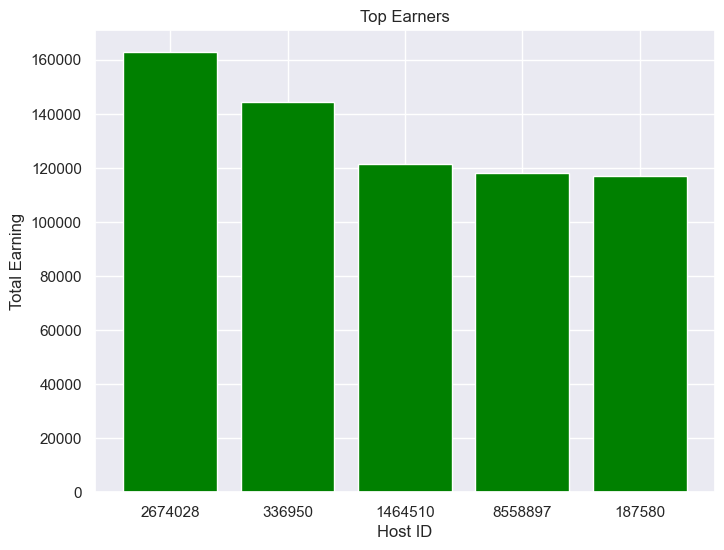

In [15]:
#  Who are top earners

# ASSUMPTION :- Taking reviews will equal to atleast number of times that room/apartment has been booked.
df['number_of_bookings'] = df['reviews']
    
# Calculate the total earnings for each host by multiplying the number of bookings with the price per night.
df['total_earning'] = df['price'] * df['number_of_bookings']

# Identify the hosts with the highest total earnings to determine the top earners.
top_earning_hosts = df.groupby(by=['host_id'])['total_earning'].sum()

# Sorting the top earning hosts in descending order
top_earners = top_earning_hosts.sort_values(ascending=False).head(5)

# Print the top earners
print("Top 5 Earners:")

for host_id, earnings in top_earners.iteritems():
    print(f"Host ID : {host_id}, Total Earnings: {earnings}")

# Ploting graph of Top Earners
plt.figure(figsize=(8,6))
plt.title("Top Earners")
plt.bar(x=[str(i) for i in dict(top_earners).keys()],height=dict(top_earners).values(),color='green')
plt.xlabel("Host ID")
plt.ylabel("Total Earning")
plt.show()

#### Results - 2674028 host id is the highest earner.

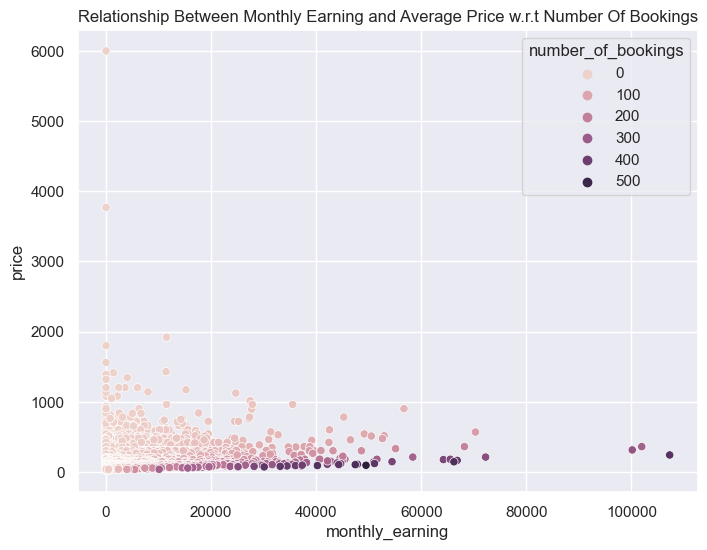


Correlation between monthly_earning and price :  0.144265808993308

Correlation between monthly_earning and number of bookings :  0.8511401333735175


In [16]:
# Is there any relationship between monthly earning and prices

# Convert 'last_modified' column to datetime
df['last_modified'] = pd.to_datetime(df['last_modified'])

# Creating new month column from last_modified column
df['month'] = df['last_modified'].dt.month
    
# Calculate the total earnings for each host by multiplying the number of bookings with the price per night.
df['monthly_earning'] = df['price'] * df['number_of_bookings']

# Identify the hosts with the highest total earnings to determine the top earners.
monthly_earning = df.groupby(by=['host_id','month'])['monthly_earning'].sum()

# # Relationship between monthly earning and prices
plt.figure(figsize=(8,6))
plt.title("Relationship Between Monthly Earning and Average Price w.r.t Number Of Bookings")
sns.scatterplot(x=df['monthly_earning'],y=df['price'],hue=df['number_of_bookings'],)
plt.xlabel("monthly_earning")
plt.ylabel("price")
plt.show()

# Correlation between monthly_earning and price
print("\nCorrelation between monthly_earning and price : ", df['monthly_earning'].corr(df['price'],method='pearson'))
print("\nCorrelation between monthly_earning and number of bookings : ", df['monthly_earning'].corr(df['number_of_bookings'],method='pearson'))


#### Conclusions - Monthly earning has little dependency on price for one night as it has correlation of 0.144. It is more dependent of number of times the room is booked as it has correlation of 0.85.

maximum booking location (using location column) :  0101000020E6100000DAFE9595268513402C82FFAD642F4A40
Nieghborhood with maximum booking :- De Baarsjes / Oud West : 52823 bookings


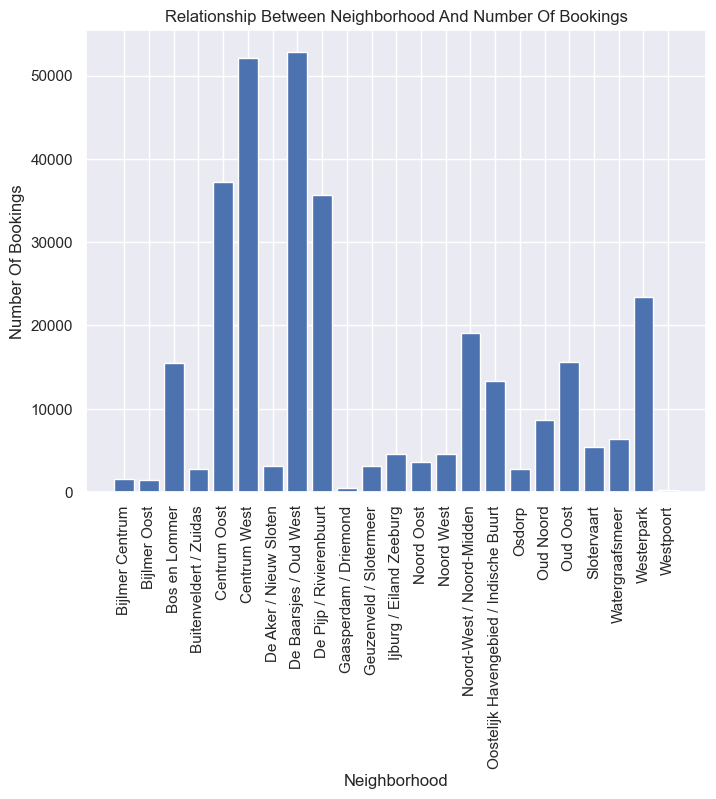

In [17]:
#  Any particular location getting maximum number of bookings

# Assumption:- Number of bookings is equal to number of reviews given for the room

# Getting maximum number of bookings according to the location column in the dataset
maximum_booking_location = df[df['number_of_bookings'] == df['number_of_bookings'].max()]['location']

print("maximum booking location (using location column) : ",list(maximum_booking_location)[0])

# Getting summation of number of booking for each neighborhood column as location
neighborhoods_bookings = df.groupby(['neighborhood'])['number_of_bookings'].sum()

# The values
most_popular_neighborhood = neighborhoods_bookings.idxmax()
max_bookings = neighborhoods_bookings.max()

# Print
print(f"Nieghborhood with maximum booking :- {most_popular_neighborhood} : {max_bookings} bookings") 

# Relationship of neighborhood with numbers of booking
plt.figure(figsize=(8,6))
plt.title("Relationship Between Neighborhood And Number Of Bookings")
plt.bar(x=dict(neighborhoods_bookings).keys(),height=dict(neighborhoods_bookings).values())
plt.xlabel("Neighborhood")
plt.xticks(rotation='vertical')
plt.ylabel("Number Of Bookings")
plt.show()


#### Conclusions :
#### Maximum Bookings Neighborhoods - De Baarsjes/Oud West and Centrum West are two neighborhoods with maximum number of booking more than 50000.
#### Least Bookings Neighborhoods - Westpoort and Gaasperdam/Driemond.

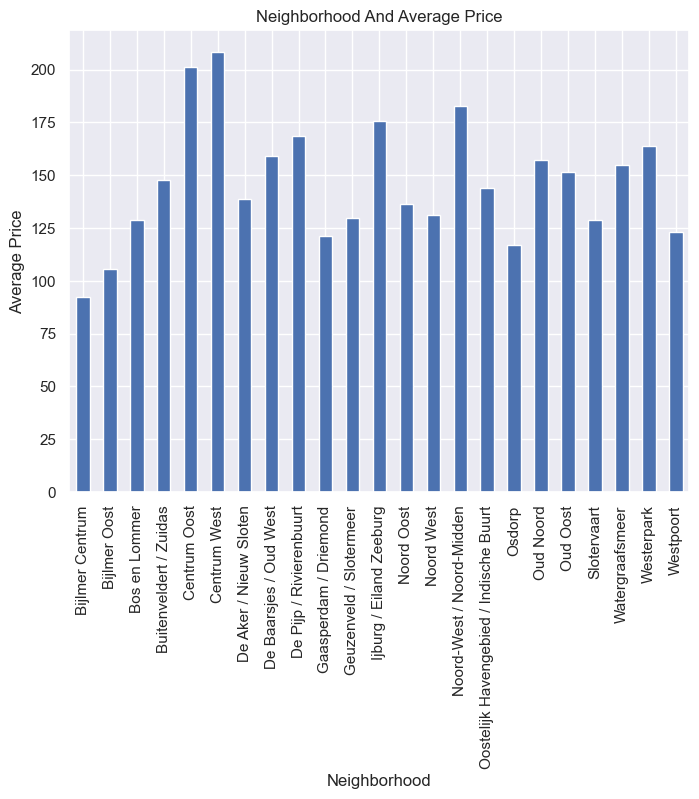

In [18]:
#  Price relation with respect to location

neighborhoods_price = df.groupby(['neighborhood'])['price'].mean()

# Relationship with neighborhood vs average price
plt.figure(figsize=(8,6))
plt.title("Neighborhood And Average Price")
neighborhoods_price.plot(kind='bar')
plt.xlabel("Neighborhood")
plt.xticks(rotation='vertical')
plt.ylabel("Average Price")
plt.show()


#### Conclusions :
#### Neighborhoods With High Average Price - Centrum oost and Centrum West have average price more than 200.
#### Neighborhoods with less Average Price - Bijlmer Centrum and Bijlmer Oost have average price less than 100.

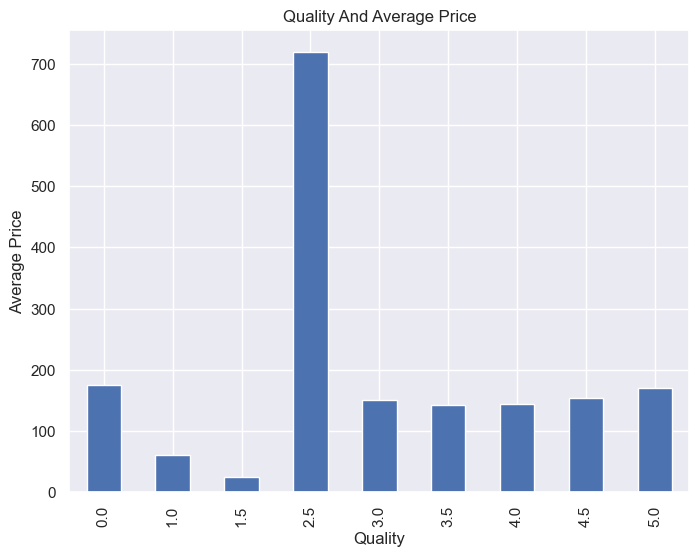


Correlation between overall_satisfaction and price :  -0.044774956668632813


In [19]:
#  Relationship between Quality and Price
# Taking number of overall_satisfaction as parameter of quality, grouping overall_satisfaction with mean of price.
quality_price = df.groupby(['overall_satisfaction'])['price'].mean()

# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("Quality And Average Price")
quality_price.plot(kind='bar')
plt.xlabel("Quality")
plt.ylabel("Average Price")
plt.show()

# Correlation between overall_satisfaction and average price
print("\nCorrelation between overall_satisfaction and price : ", df['overall_satisfaction'].corr(df['price'],method='pearson'))

#### Conclusions : Higher price has negative impact on overall satisfaction of the customer. Most rooms which have received rating between 3.0 to 5.0 have average price between 100 and 200.

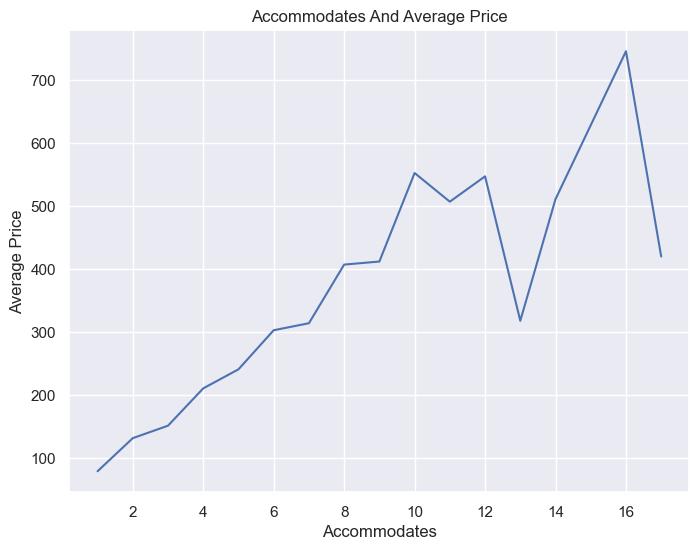


Correlation between Accommodates and Price :  0.5003502320596696


In [20]:
# Taking number of accommodates as parameter of amenitites, grouping accormmodates with average price
accommodates_price = df.groupby(['accommodates'])['price'].mean()

# Relationship between accommodates and price
plt.figure(figsize=(8,6))
plt.title("Accommodates And Average Price")
accommodates_price.plot(kind='line')
plt.xlabel("Accommodates")
plt.ylabel("Average Price")
plt.show()

# Correlation between accommodates and price
print("\nCorrelation between Accommodates and Price : ", df['accommodates'].corr(df['price']))


#### Conclusion : Price of room shares a linear relationship with Accommodates. Increase in number of accommodates increases the price of the room. There is also correlation of almost 0.50 between both.

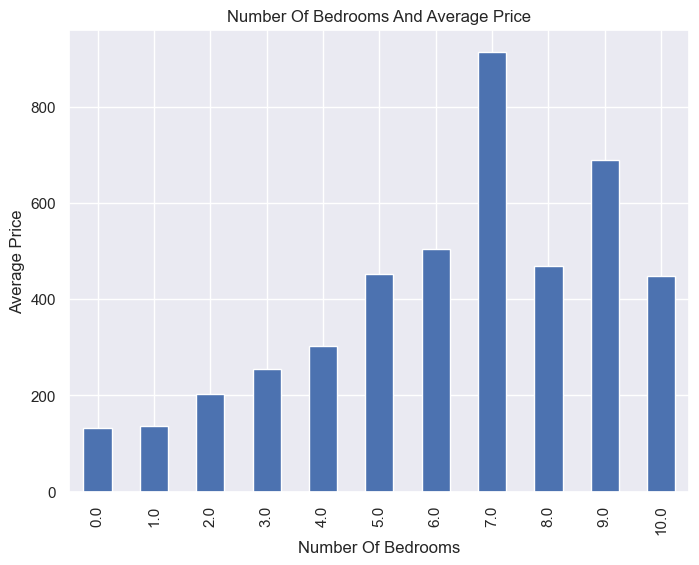


Correlation between Number Of Bedrooms and price :  0.4461436487654144


In [21]:
# Taking number of bedrooms as parameter of amenitites, grouping bedrooms with average price
accommodates_price = df.groupby(['bedrooms'])['price'].mean()

# Relationship with number of bedrooms and price
plt.figure(figsize=(8,6))
plt.title("Number Of Bedrooms And Average Price")
accommodates_price.plot(kind='bar')
plt.xlabel("Number Of Bedrooms")
plt.ylabel("Average Price")
plt.show()

# Correlation between number of bedrooms and price
print("\nCorrelation between Number Of Bedrooms and price : ", df['bedrooms'].corr(df['price']))

#### Conclusion : Price of room shares a linear relationship with number of bedrooms. The price of the room increases with increase in number of bedroom in the room. There is also correlation of almost 0.50 between both.

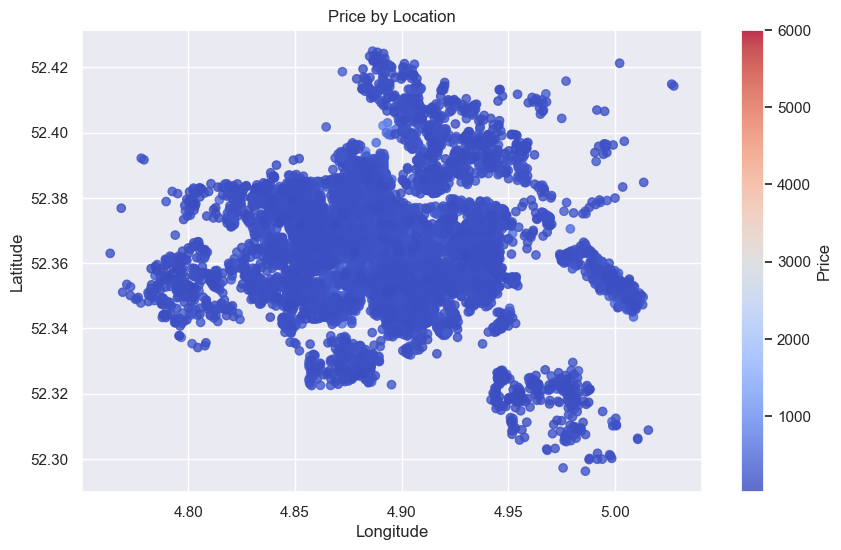

In [22]:
#  Price vs location

# Plot the relationship between latitude, longitude, and price
plt.figure(figsize=(10, 6))
plt.scatter(x=df['longitude'], y=df['latitude'], c=df['price'],cmap='coolwarm',alpha=0.8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location')
plt.colorbar(label='Price')
plt.grid(True)
plt.show()

#### Conclusion : Almost all the location on the graph shown above points that mostly rooms have rent price less than 1000.

In [23]:
df.columns

Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'name',
       'last_modified', 'latitude', 'longitude', 'location',
       'number_of_bookings', 'total_earning', 'month', 'monthly_earning'],
      dtype='object')

### Univariate Analysis 

In [24]:
# This function is used to do each columns univariate analysis
def univariate_analysis(column,plot='count',title='none',xlabel='none',ylabel='none',xticks="horizontal"):
    
    plt.figure(figsize=(8,4))
    palette_color = sns.color_palette('coolwarm')
    if plot == "count":
        sns.countplot(x=df[column],palette=palette_color)
        plt.ylabel(ylabel)
    if plot == "pie":
        plt.pie(x=list(df[column].value_counts().values),labels=list(df[column].value_counts().index),\
                colors=palette_color,autopct='%.0f%%')
    if plot == "dis":
        sns.displot(x=df[column],data = df)
        plt.ylabel(ylabel)
    if plot == "bar":
        plt.figure(figsize=(8,6))
        sns.barplot(x=data.index,y=data.values,data=df)
        
    plt.xlabel(xlabel)
    plt.xticks(rotation=xticks)
    plt.title(title)
    plt.show()

<Figure size 800x400 with 0 Axes>

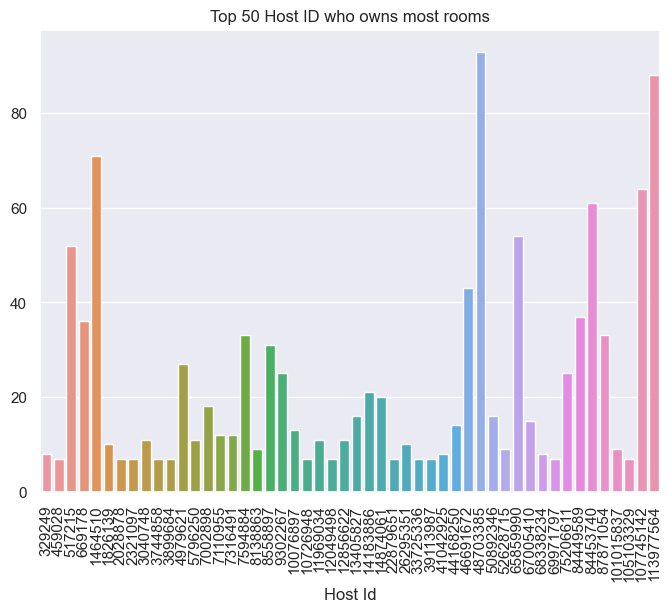


Top 50 host who owns most number of rooms data summary : 
count    50.000000
mean     22.580000
std      21.793174
min       7.000000
25%       8.000000
50%      12.000000
75%      30.000000
max      93.000000
Name: host_id, dtype: float64


In [25]:
# host_id column
# Top 50 host_id with maximum number of rooms
data = df['host_id'].value_counts().sort_values(ascending=False).head(50)

#calling funcion
univariate_analysis('host_id',title='Top 50 Host ID who owns most rooms',xlabel='Host Id',ylabel="Count of Rooms",plot='bar',
                    xticks='vertical')

print("\nTop 50 host who owns most number of rooms data summary : ")
print(data.describe())

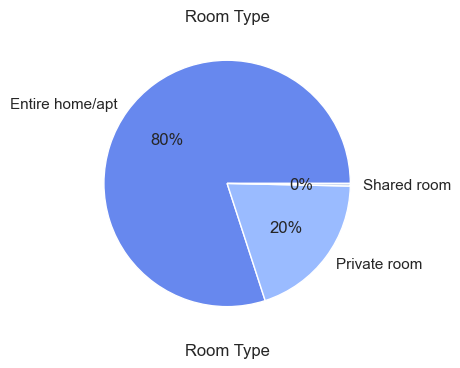

Room type data summary : 
count               18723
unique                  3
top       Entire home/apt
freq                14978
Name: room_type, dtype: object


In [26]:
# room_type column
univariate_analysis('room_type',title='Room Type',xlabel='Room Type',ylabel="Count",plot='pie',)
print("Room type data summary : ")
print(df.room_type.describe())

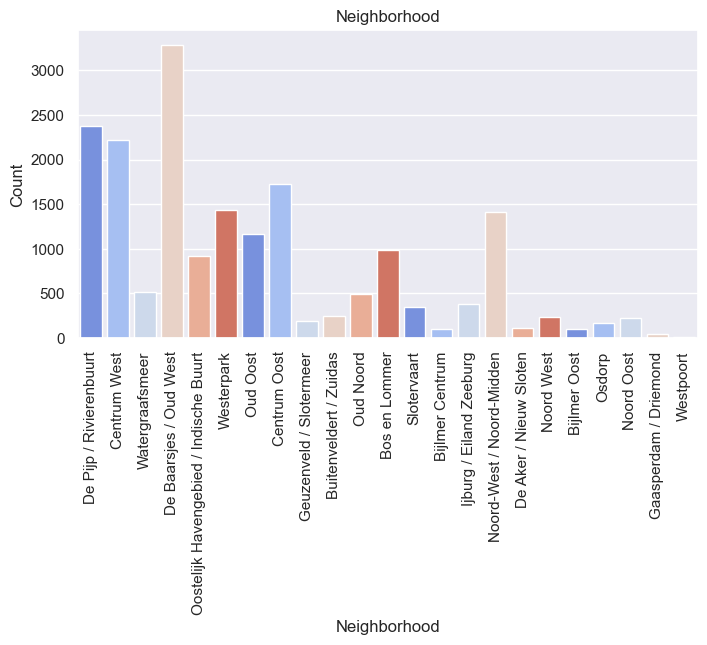

Neighborhood data summary : 
count                      18723
unique                        23
top       De Baarsjes / Oud West
freq                        3289
Name: neighborhood, dtype: object


In [27]:
# Neighborhood column
univariate_analysis('neighborhood',title='Neighborhood',xlabel='Neighborhood',ylabel="Count",plot='count',xticks='vertical')
print("Neighborhood data summary : ")
print(df['neighborhood'].describe())

<Figure size 800x400 with 0 Axes>

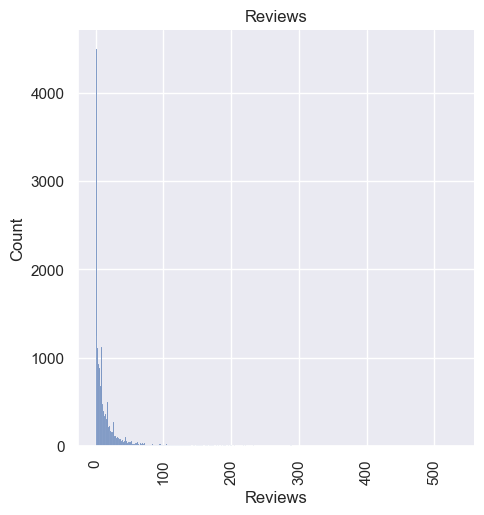

Reviews data summary : 
count    18723.000000
mean        16.741548
std         33.522630
min          0.000000
25%          2.000000
50%          6.000000
75%         17.000000
max        532.000000
Name: reviews, dtype: float64


In [28]:
# Reviews column
univariate_analysis('reviews',title='Reviews',xlabel='Reviews',ylabel="Count",plot='dis',xticks='vertical')
print("Reviews data summary : ")
print(df['reviews'].describe())

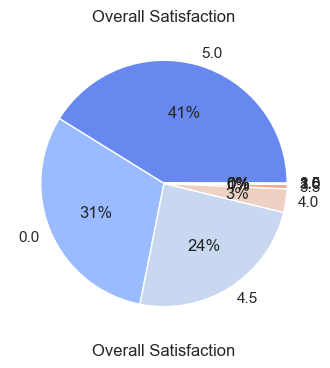

Overall Satisfaction data summary : 
count    18723.000000
mean         3.301127
std          2.213558
min          0.000000
25%          0.000000
50%          4.500000
75%          5.000000
max          5.000000
Name: overall_satisfaction, dtype: float64

ratings | count of records
5.0    7708
0.0    5748
4.5    4559
4.0     577
3.5     109
3.0      19
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64


In [29]:
# Reviews column
univariate_analysis('overall_satisfaction',title='Overall Satisfaction',xlabel='Overall Satisfaction',ylabel="Count",plot='pie',xticks='90')
print("Overall Satisfaction data summary : ")
print(df['overall_satisfaction'].describe())
print("\nratings | count of records")
print(df['overall_satisfaction'].value_counts())

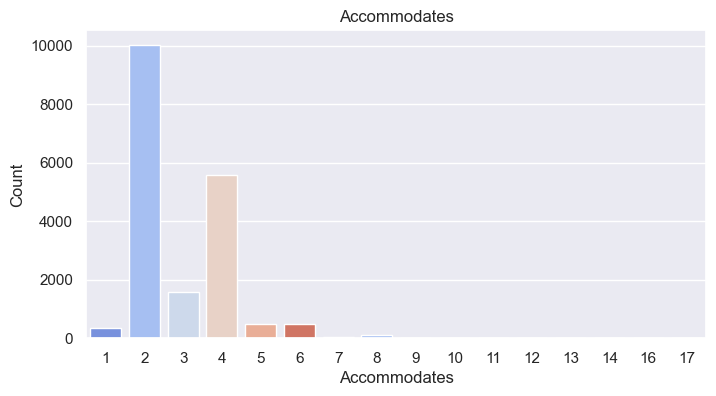

Accommodates data summary : 
count    18723.000000
mean         2.922021
std          1.327524
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: accommodates, dtype: float64

accommodates | count of rows
2     10024
4      5579
3      1585
6       476
5       471
1       367
8       105
7        52
16       20
10       16
12       10
9         8
14        6
11        2
13        1
17        1
Name: accommodates, dtype: int64


In [30]:
# Accommodates column
univariate_analysis('accommodates',title='Accommodates',xlabel='Accommodates',ylabel="Count",plot='count')
print("Accommodates data summary : ")
print(df['accommodates'].describe())
print("\naccommodates | count of rows")
print(df['accommodates'].value_counts())

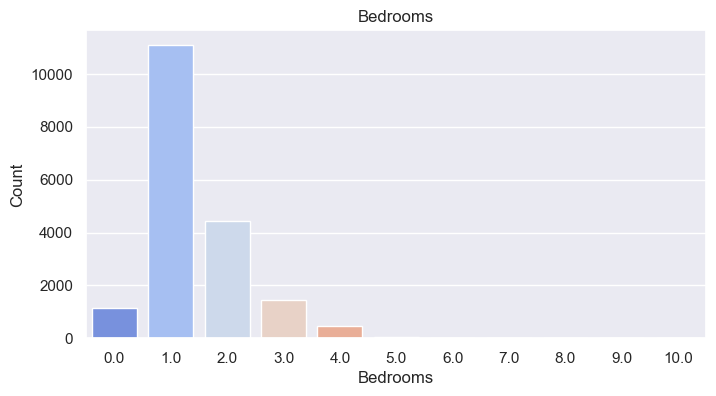

Bedrooms data summary : 
count    18723.000000
mean         2.922021
std          1.327524
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: accommodates, dtype: float64

Bedrooms | count of records
1.0     11101
2.0      4456
3.0      1444
0.0      1154
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64


In [31]:
# Bedrooms column
univariate_analysis('bedrooms',title='Bedrooms',xlabel='Bedrooms',ylabel="Count",plot='count')
print("Bedrooms data summary : ")
print(df['accommodates'].describe())
print("\nBedrooms | count of records")
print(df['bedrooms'].value_counts())

<Figure size 800x400 with 0 Axes>

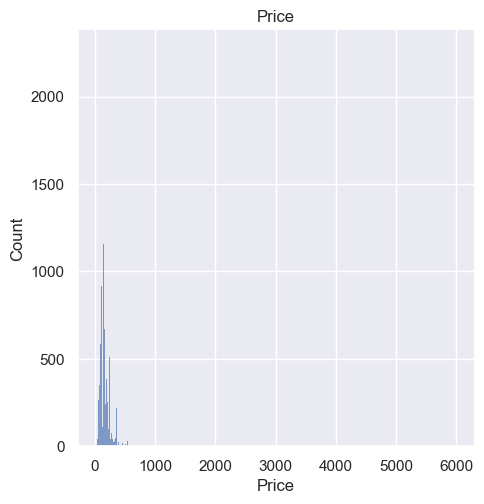

Price data summary : 
count    18723.000000
mean       166.599477
std        108.943849
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64


In [32]:
# Price column
univariate_analysis('price',title='Price',xlabel='Price',ylabel="Count",plot='dis')
print("Price data summary : ")
print(df['price'].describe())

<Figure size 800x400 with 0 Axes>

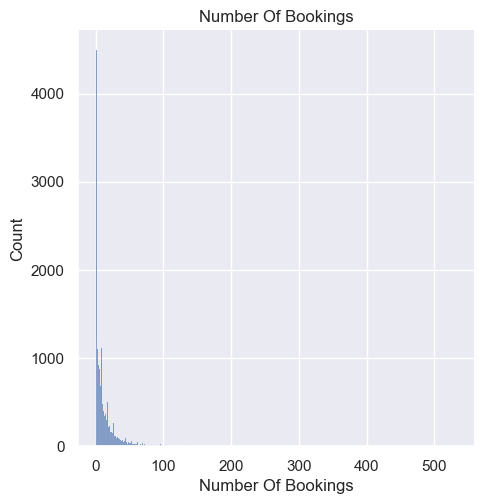

Number Of Booking data summary :
count    18723.000000
mean        16.741548
std         33.522630
min          0.000000
25%          2.000000
50%          6.000000
75%         17.000000
max        532.000000
Name: number_of_bookings, dtype: float64


In [33]:
# number_of_bookings column
univariate_analysis('number_of_bookings',title='Number Of Bookings',xlabel='Number Of Bookings',ylabel="Count",plot='dis')
print("Number Of Booking data summary :")
print(df['number_of_bookings'].describe())

<Figure size 800x400 with 0 Axes>

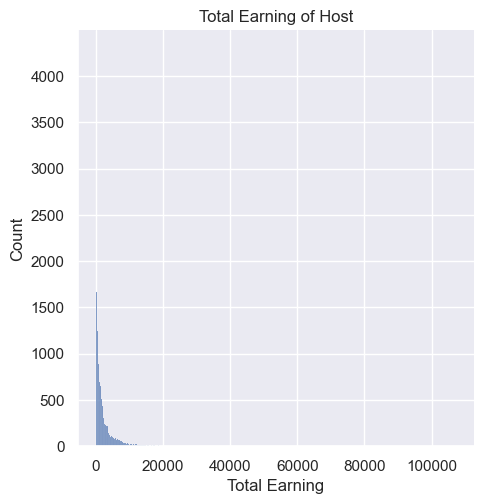

Total Earnings data summary :
count     18723.000000
mean       2480.490573
std        4838.254392
min           0.000000
25%         236.000000
50%         936.000000
75%        2640.000000
max      107280.000000
Name: total_earning, dtype: float64


In [34]:
# Total Earning column
univariate_analysis('total_earning',title='Total Earning of Host',xlabel='Total Earning',ylabel="Count",plot='dis')
print("Total Earnings data summary :")
print(df['total_earning'].describe())

<Figure size 800x400 with 0 Axes>

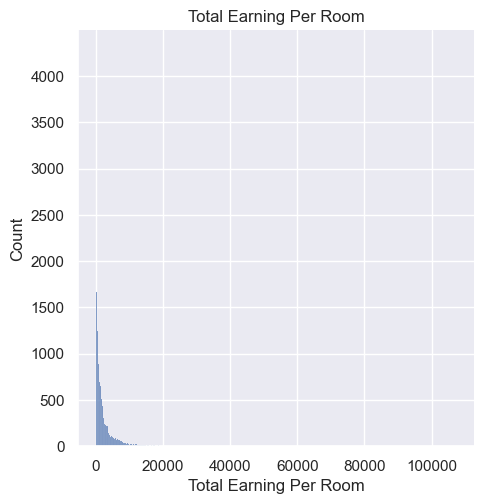

Total Earnings Per Room data summary :
count     18723.000000
mean       2480.490573
std        4838.254392
min           0.000000
25%         236.000000
50%         936.000000
75%        2640.000000
max      107280.000000
Name: total_earning_per_room, dtype: float64


In [35]:
# Total_Earning_per_room_id : created additional column
df['total_earning_per_room'] = df['number_of_bookings'] * df['price']
  
# Total Earning column
univariate_analysis('total_earning_per_room',title='Total Earning Per Room',xlabel='Total Earning Per Room',ylabel="Count",plot='dis')
print("Total Earnings Per Room data summary :")
print(df['total_earning_per_room'].describe())

### Bivariate Analysis

<Axes: xlabel='total_earning_per_room', ylabel='Count'>

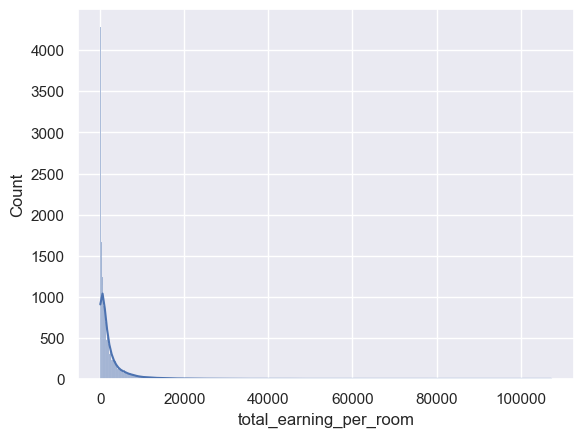

In [36]:
sns.histplot(df['total_earning_per_room'],kde=True)

In [37]:
df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location,number_of_bookings,total_earning,month,monthly_earning,total_earning_per_room
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...,7,1092.0,7,1092.0,1092.0
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...,45,5670.0,7,5670.0,5670.0
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...,1,132.0,7,132.0,132.0
3,6137978,8685430,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...,7,847.0,7,847.0,847.0
4,18630616,70191803,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...,1,93.0,7,93.0,93.0


In [38]:
# This function will helps us see the relationship with one attributes to the other attributes of the dataframe
def bivariate_analysis(column,data:pd.DataFrame,hspace=0.4,wspace=0.2):
    
    # Droping the one constant column with which other columns will be analyze
    data_cols= data.columns.drop(column)  
    
    # Building grid of 3 * 3
    pcols,prows = 3, int(np.ceil(len(data_cols)/3))
    plt.figure(figsize=(16,12),)
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    plt.suptitle(f"Relationship Of {column} with Other Attributes", fontsize=16, y=0.95)
    
    # Looping with the columns of the dataset
    for n,col in enumerate(data_cols):
        
        # Plotting subplots
        ax = plt.subplot(prows,pcols,n+1)
        sns.scatterplot(ax=ax,x=data[col],y=data[column])
        ax.set_title(f'{column} and {col}')
        ax.set_xlabel(f'{col}')  


In [39]:
# Calculation of given column with mean of the other columns
def groupby_description(column,data:pd.DataFrame):
    
    # Droping the one constant column with which other columns will be analyze
    data_cols= data.columns.drop(column) 
    
    return data.groupby([column])[data_cols].describe()
   

In [40]:
# We are going to see relationship between below number of columns with each other 
bivariate_analysis_columns = ['room_type','reviews','overall_satisfaction','accommodates','bedrooms','price',
                              'number_of_bookings','total_earning_per_room',]

# Creating a copy of df with the above columns
data=df[bivariate_analysis_columns]
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

<Axes: >

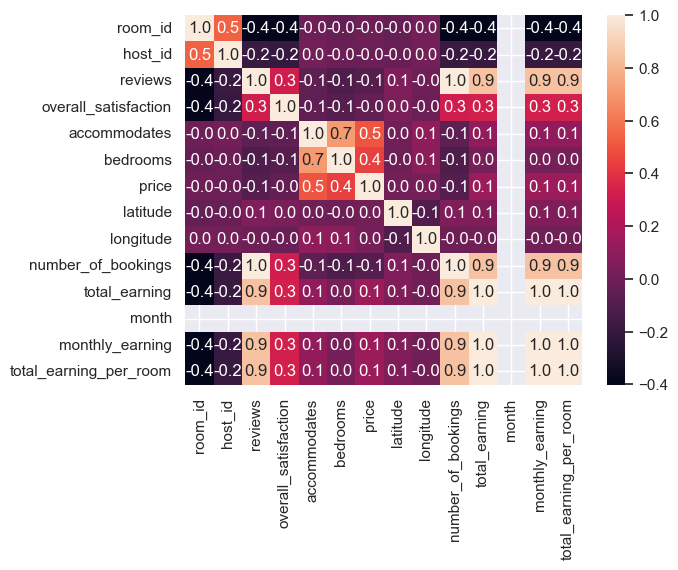

In [41]:
# heat map to understand correlation between the attributes
sns.heatmap(df.corr(),annot=True,fmt='.1f')

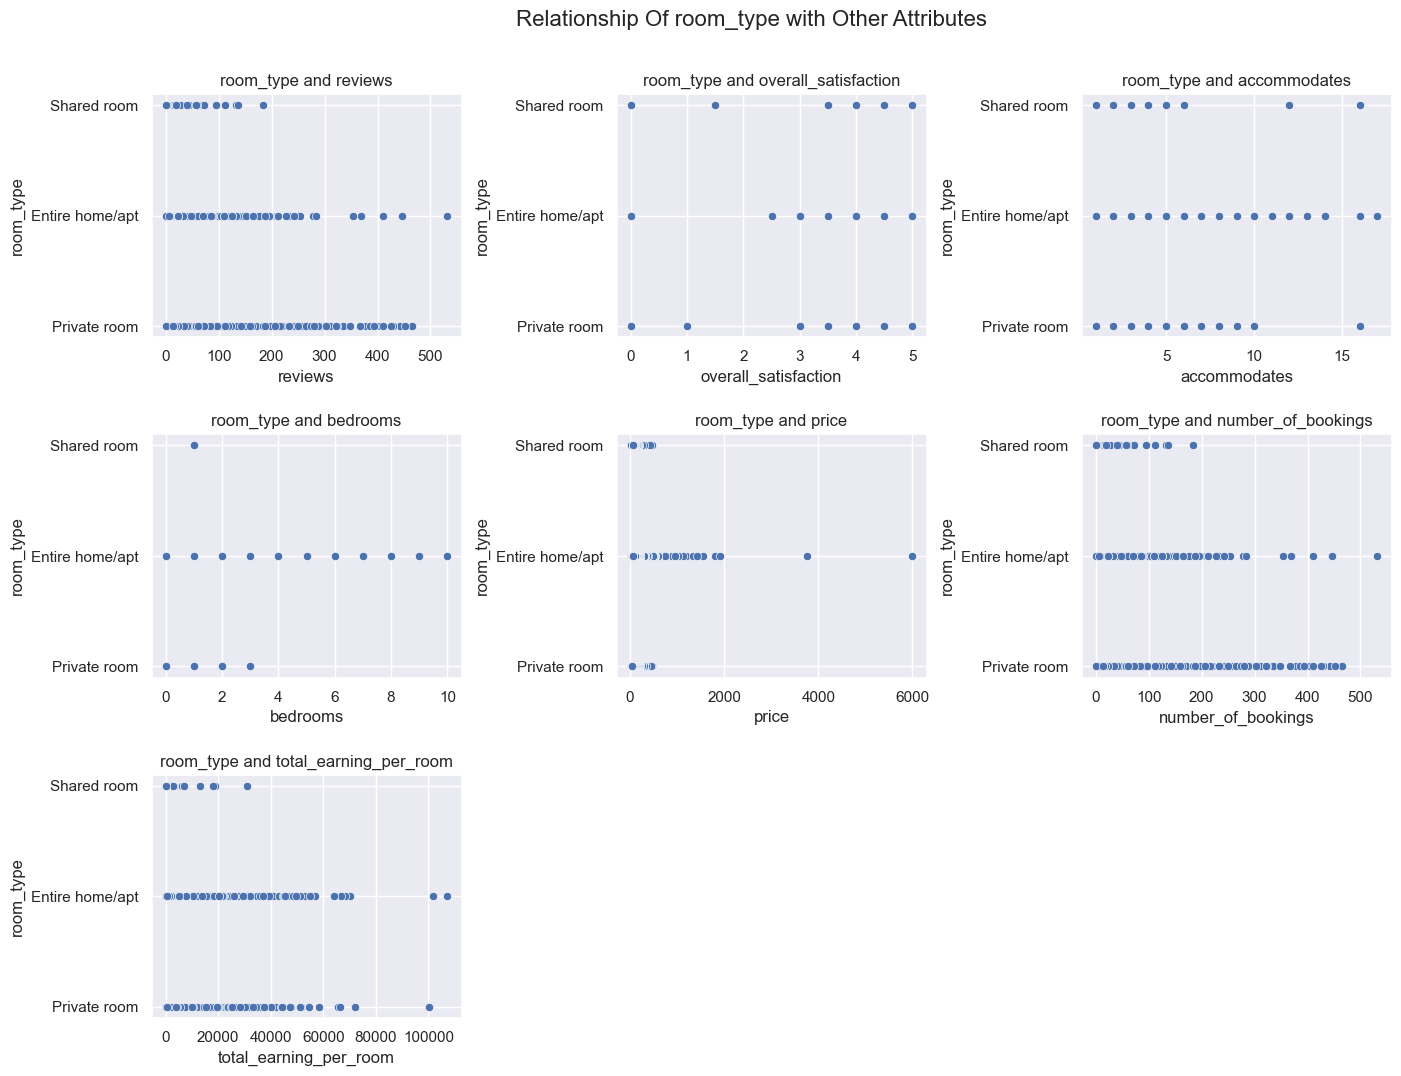

In [42]:
# room_type column relationship with other attributes

bivariate_analysis('room_type',data=data,wspace=0.5)

#### Conclusion :
#### 1. Entire home/apartment and private rooms have more reviews.
#### 2. Entire home/apartment provides more number of bedrooms more than 5 upto 10 whereas shared room has less than 2 bedrooms.
#### 3. price distribution for entire home/apartment can go upto 6000 but for other is upto 1000.
#### 4. shared rooms have less number of bookings than other.
#### 5. Entire home apartment and private rooms total earning is more.

In [43]:
# Description of the other attributes with the given column by calling function
groupby_description('room_type',data=data)


reviews                                                     \
                   count       mean        std  min  25%   50%   75%    max   
room_type                                                                     
Entire home/apt  14978.0  11.898985  19.987621  0.0  2.0   6.0  14.0  532.0   
Private room      3682.0  36.378055  59.869472  0.0  2.0  12.0  42.0  465.0   
Shared room         63.0  20.396825  38.086294  0.0  1.0   5.0  13.5  184.0   

                overall_satisfaction                                          \
                               count      mean       std  min  25%  50%  75%   
room_type                                                                      
Entire home/apt              14978.0  3.249032  2.244288  0.0  0.0  4.5  5.0   
Private room                  3682.0  3.526480  2.066286  0.0  0.0  4.5  5.0   
Shared room                     63.0  2.515873  2.255760  0.0  0.0  3.5  4.5   

                     accommodates                                          \
                 max        count      mean       std  min  25%  50%  75%   
room_type                                                                   
Entire home/apt  5.0      14978.0  3.093003  1.355180  1.0  2.0  3.0  4.0   
Private room     5.0       3682.0  2.224063  0.861528  1.0  2.0  2.0  2.0   
Shared room      5.0         63.0  3.063492  2.906461  1.0  2.0  2.0  4.0   

                      bedrooms                                                \
                  max    count      mean       std  min  25%  50%  75%   max   
room_type                                                                      
Entire home/apt  17.0  14978.0  1.543798  0.929790  0.0  1.0  1.0  2.0  10.0   
Private room     16.0   3682.0  0.976372  0.388277  0.0  1.0  1.0  1.0   3.0   
Shared room      16.0     63.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   

                   price                                                     \
                   count        mean         std   min    25%    50%    75%   
room_type                                                                     
Entire home/apt  14978.0  181.547136  114.486294  12.0  119.0  155.0  210.0   
Private room      3682.0  106.870451   48.738086  21.0   78.0   96.0  119.0   
Shared room         63.0  103.682540   82.910917  18.0   56.0   82.0  123.5   

                        number_of_bookings                                  \
                    max              count       mean        std  min  25%   
room_type                                                                    
Entire home/apt  6000.0            14978.0  11.898985  19.987621  0.0  2.0   
Private room      474.0             3682.0  36.378055  59.869472  0.0  2.0   
Shared room       462.0               63.0  20.396825  38.086294  0.0  1.0   

                                   total_earning_per_room               \
                  50%   75%    max                  count         mean   
room_type                                                                
Entire home/apt   6.0  14.0  532.0                14978.0  2153.646281   
Private room     12.0  42.0  465.0                 3682.0  3813.568169   
Shared room       5.0  13.5  184.0                   63.0  2275.444444   

                                                                    
                         std  min    25%     50%     75%       max  
room_type                                                           
Entire home/apt  4124.420694  0.0  236.0   900.0  2394.0  107280.0  
Private room     6867.364417  0.0  236.0  1152.0  4212.0  100152.0  
Shared room      5300.419605  0.0   84.0   360.0  1047.0   30954.0

#### Description : Above data shows of each room_type with the description like mean,count,min,max etc of other attributes. 

Correlation of reviews with other attributes :

overall_satisfaction      0.316705
accommodates             -0.061360
bedrooms                 -0.114641
price                    -0.084516
number_of_bookings        1.000000
total_earning_per_room    0.851140
Name: reviews, dtype: float64


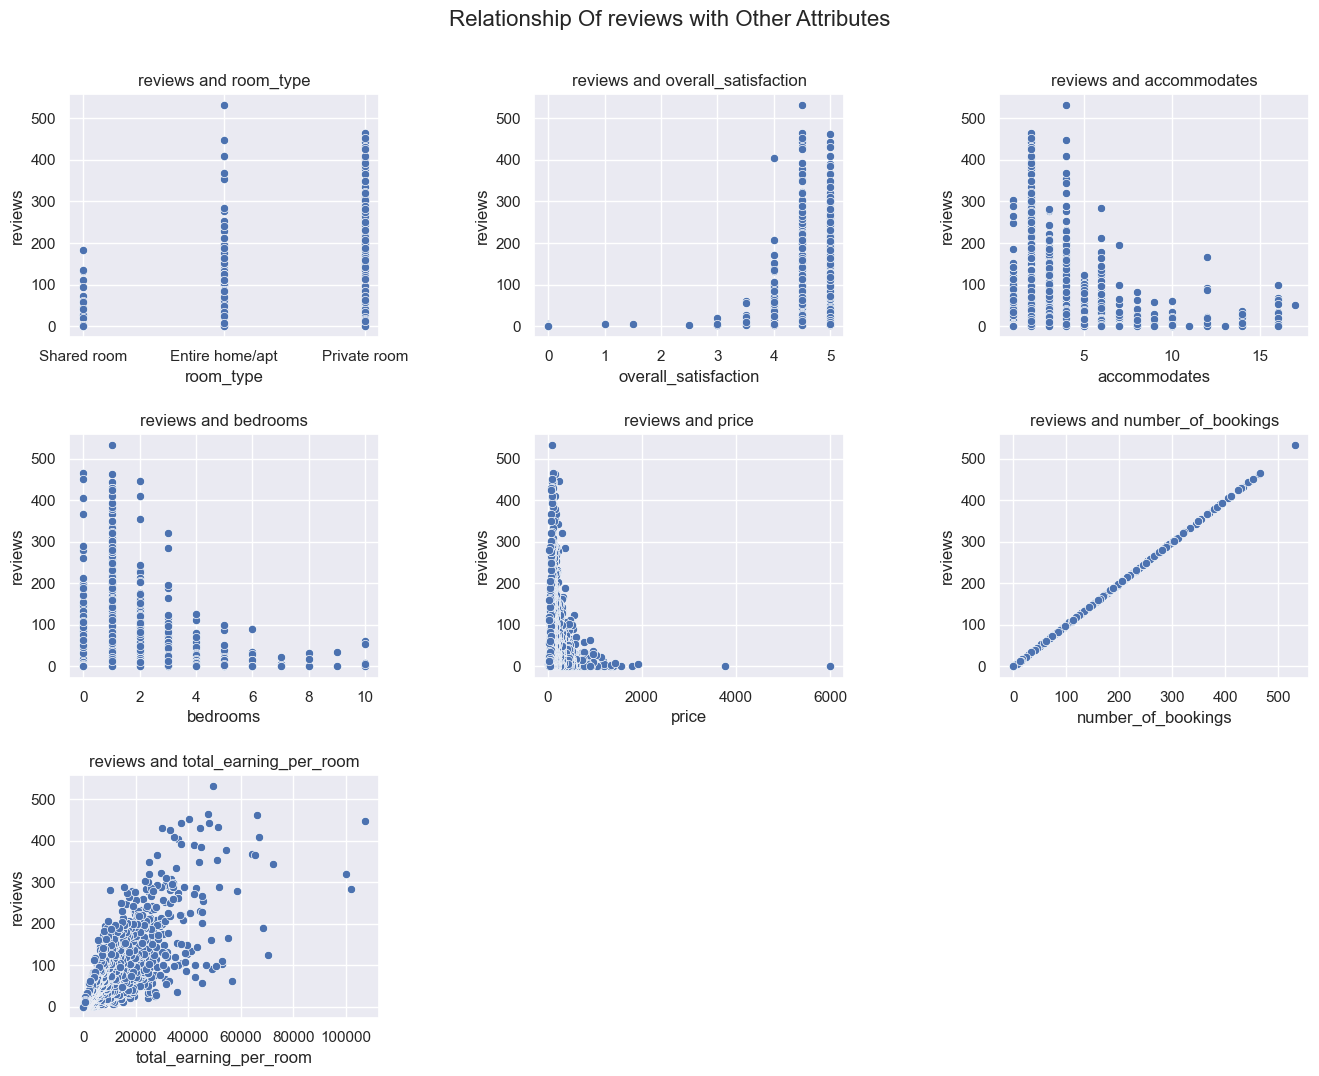

In [44]:
# reviews column relationship with other attributes

bivariate_analysis('reviews',data=data,wspace=0.5)

# Correaltion of reviews with other Attributes
print("Correlation of reviews with other attributes :\n")
print(data.corr().loc['reviews'].iloc[1:])

#### Conclusion :
#### 1. Number of reviews is high on home/apartmen and private rooms.
#### 2. High reviews when overall satisfaction of customers are 4.5 and 5.
#### 3. Number of reviews is decreasing with increase in number of accommodates.
#### 4. More number of reviews if room has less number of bedrooms.
#### 5. More number of reviews on room having price less than 1000.
#### 6. With More number of reviews total earning of the room is increasing.So highly correlated.

In [45]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of overall_satisfaction with other attributes :

reviews                   0.316705
accommodates             -0.053410
bedrooms                 -0.087664
price                    -0.044775
number_of_bookings        0.316705
total_earning_per_room    0.328279
Name: overall_satisfaction, dtype: float64


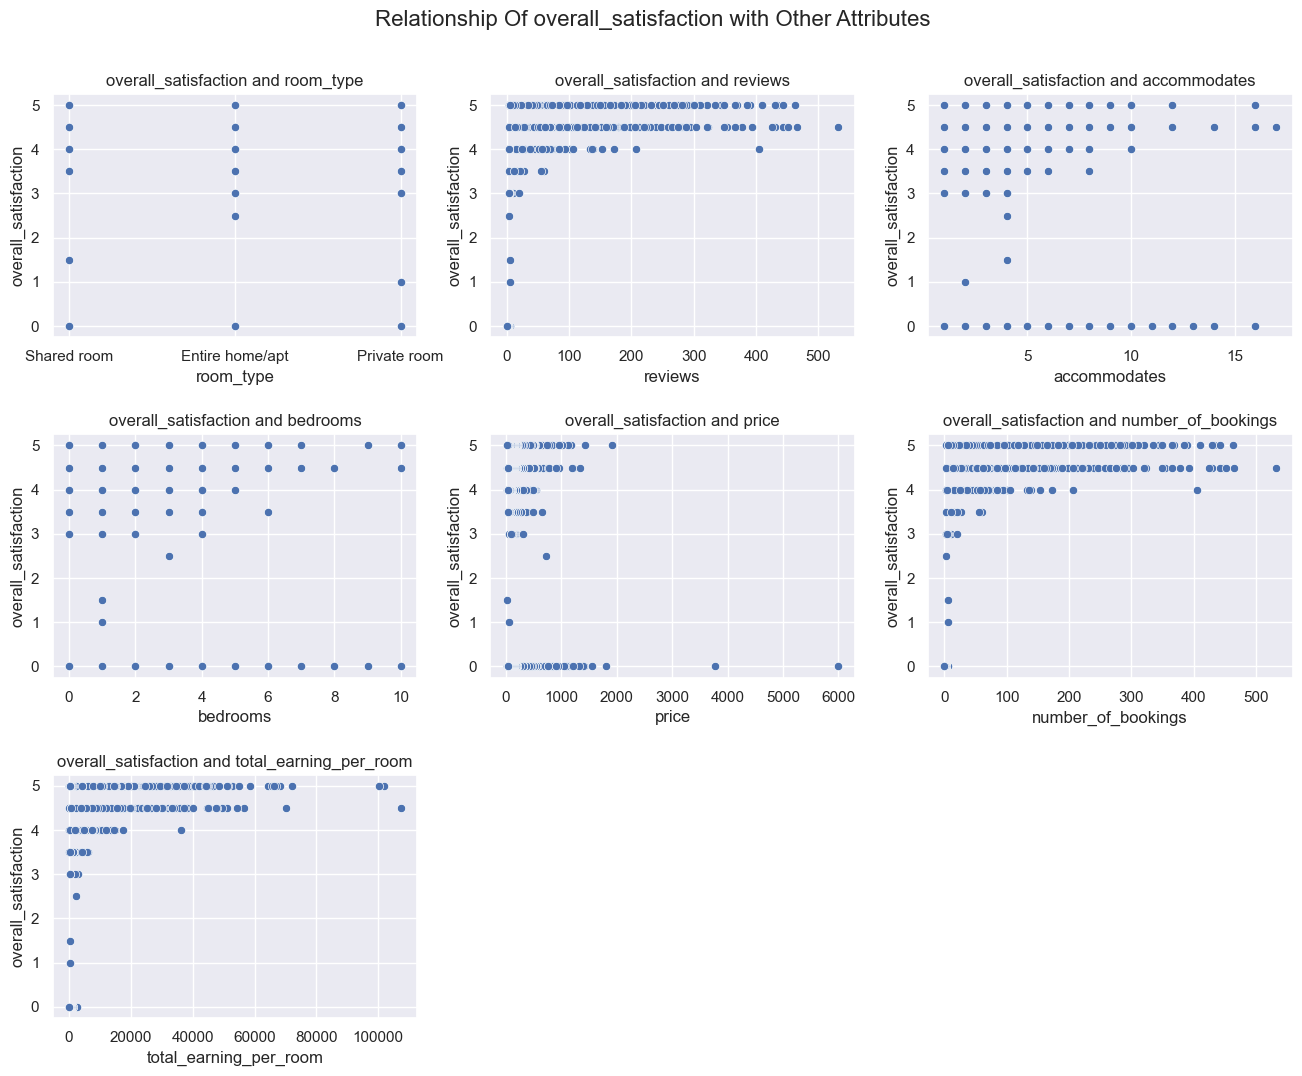

In [46]:
# overall_satisfaction column relationship with other attributes

bivariate_analysis('overall_satisfaction',data=data,)

# Correaltion of overall_satisfaction with other Attributes
print("Correlation of overall_satisfaction with other attributes :\n")
print(data.corr().loc['overall_satisfaction'].drop(['overall_satisfaction']))

#### Conclusion :
#### 1. overall_satisfaction is higher on room having more reviews.
#### 2. overall_satisfaction is higher when number of bookings is high.
#### 3. Overall_satisfaction ratings is higher when price is between 0 to 2000.
#### 4. room with high rating has higher total earning.

In [47]:
# Description of the other attributes with the given column overall_satisfaction by calling function
groupby_description('overall_satisfaction',data=data)

reviews                                              \
                       count       mean        std  min  25%   50%   75%   
overall_satisfaction                                                       
0.0                   5748.0   0.702157   0.814230  0.0  0.0   0.0   1.0   
1.0                      1.0   5.000000        NaN  5.0  5.0   5.0   5.0   
1.5                      1.0   6.000000        NaN  6.0  6.0   6.0   6.0   
2.5                      1.0   3.000000        NaN  3.0  3.0   3.0   3.0   
3.0                     19.0   5.052632   4.020416  3.0  3.0   4.0   5.0   
3.5                    109.0   8.238532   9.612780  3.0  3.0   5.0   9.0   
4.0                    577.0  16.755633  27.522861  3.0  5.0   9.0  16.0   
4.5                   4559.0  26.802369  41.922914  3.0  6.0  13.0  29.0   
5.0                   7708.0  22.904515  36.617811  3.0  6.0  12.0  23.0   

                            accommodates                                     \
                        max        count      mean       std  min  25%  50%   
overall_satisfaction                                                          
0.0                     5.0       5748.0  3.024530  1.367903  1.0  2.0  2.0   
1.0                     5.0          1.0  2.000000       NaN  2.0  2.0  2.0   
1.5                     6.0          1.0  4.000000       NaN  4.0  4.0  4.0   
2.5                     3.0          1.0  4.000000       NaN  4.0  4.0  4.0   
3.0                    20.0         19.0  2.684211  0.945905  1.0  2.0  2.0   
3.5                    60.0        109.0  2.899083  1.268894  1.0  2.0  2.0   
4.0                   405.0        577.0  2.941075  1.210484  1.0  2.0  2.0   
4.5                   532.0       4559.0  2.918184  1.394410  1.0  2.0  2.0   
5.0                   463.0       7708.0  2.847172  1.260017  1.0  2.0  2.0   

                                bedrooms                                     \
                      75%   max    count      mean       std  min  25%  50%   
overall_satisfaction                                                          
0.0                   4.0  16.0   5748.0  1.552018  0.947871  0.0  1.0  1.0   
1.0                   2.0   2.0      1.0  1.000000       NaN  1.0  1.0  1.0   
1.5                   4.0   4.0      1.0  1.000000       NaN  1.0  1.0  1.0   
2.5                   4.0   4.0      1.0  3.000000       NaN  3.0  3.0  3.0   
3.0                   3.5   4.0     19.0  1.263158  0.991189  0.0  1.0  1.0   
3.5                   4.0   8.0    109.0  1.247706  0.873011  0.0  1.0  1.0   
4.0                   4.0  10.0    577.0  1.258232  0.738950  0.0  1.0  1.0   
4.5                   4.0  17.0   4559.0  1.356877  0.838201  0.0  1.0  1.0   
5.0                   4.0  16.0   7708.0  1.398936  0.848163  0.0  1.0  1.0   

                                  price                                        \
                      75%   max   count        mean         std    min    25%   
overall_satisfaction                                                            
0.0                   2.0  10.0  5748.0  175.313848  139.889247   18.0  114.0   
1.0                   1.0   1.0     1.0   60.000000         NaN   60.0   60.0   
1.5                   1.0   1.0     1.0   25.000000         NaN   25.0   25.0   
2.5                   3.0   3.0     1.0  720.000000         NaN  720.0  720.0   
3.0                   2.0   4.0    19.0  151.052632   72.413530   60.0   96.0   
3.5                   1.0   6.0   109.0  142.908257   93.769965   31.0   95.0   
4.0                   2.0   5.0   577.0  143.942808   76.044430   24.0   96.0   
4.5                   2.0  10.0  4559.0  152.902610   87.782387   21.0  102.0   
5.0                   2.0  10.0  7708.0  170.231967   94.037305   12.0  114.0   

                                           number_of_bookings             \
                        50%    75%     max              count       mean   
overall_satisfaction                                                       
0.0      

#### Description : Above data shows of each type of rating with the description like mean,count,min,max etc of other attributes. 

In [48]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of accommodates with other attributes :

reviews                  -0.061360
overall_satisfaction     -0.053410
bedrooms                  0.711051
price                     0.500350
number_of_bookings       -0.061360
total_earning_per_room    0.112062
Name: accommodates, dtype: float64


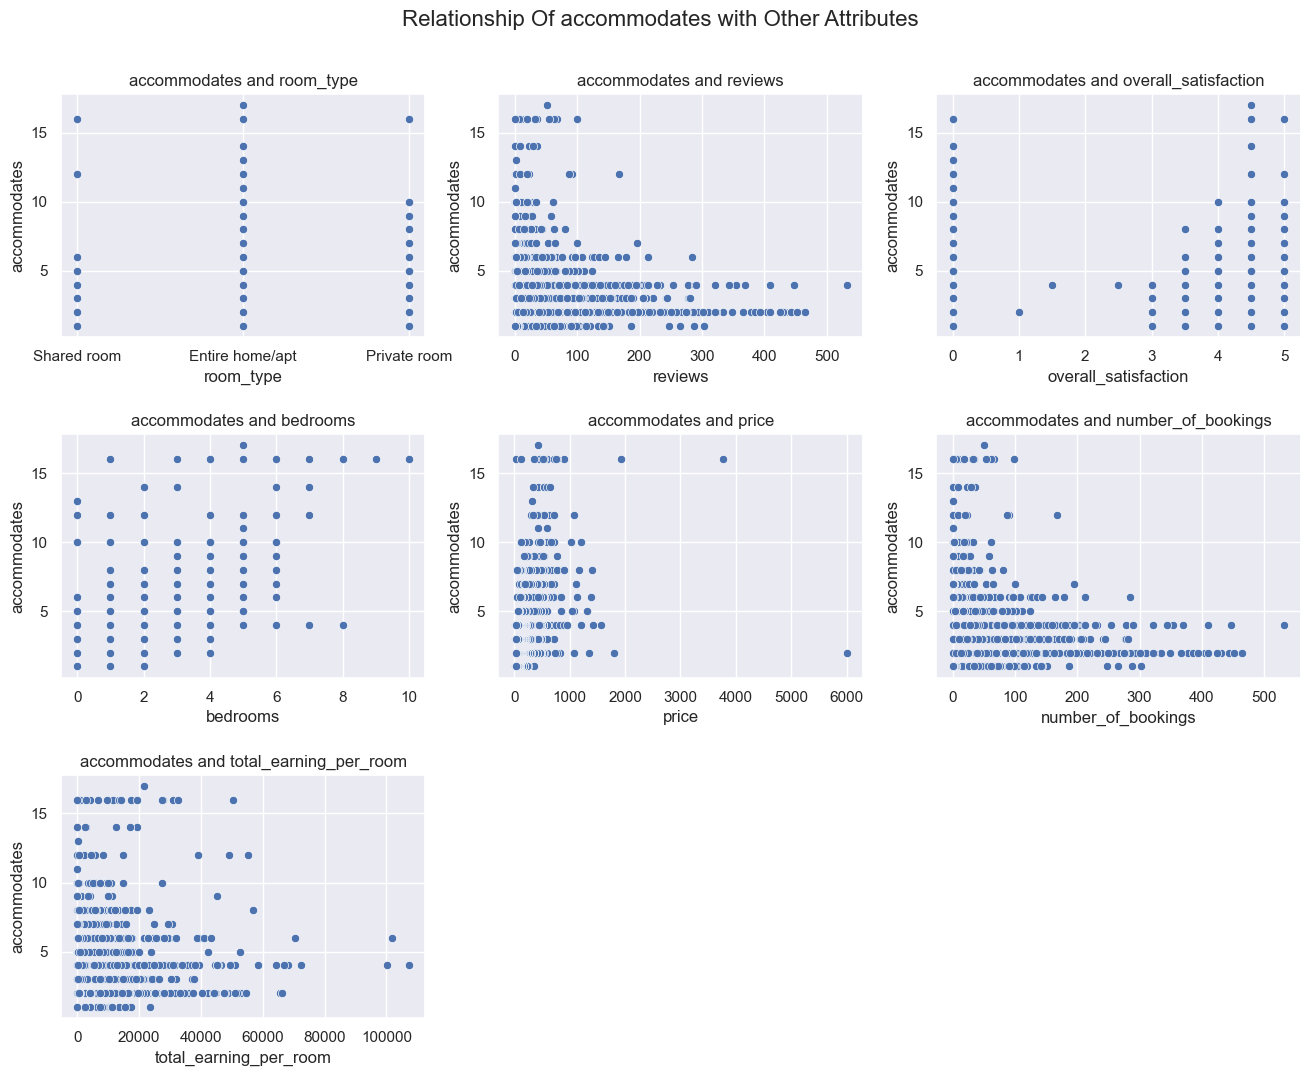

In [49]:
# accommodates column relationship with other attributes

bivariate_analysis('accommodates',data=data,)

# Correaltion of accommodates with other Attributes
print("Correlation of accommodates with other attributes :\n")
print(data.corr().loc['accommodates'].drop(['accommodates']))

#### Conclusion :
#### 1. less accommdates more reviews
#### 2. Higher the number of accommodates, higher the price of the room.
#### 3. More number of accommodates choose rooms with more bedrooms.

In [50]:
# Description of the other attributes with the given column accommodates by calling function
groupby_description('accommodates',data=data)

reviews                                                         \
                count       mean        std   min    25%   50%    75%    max   
accommodates                                                                   
1               367.0  20.051771  39.643838   0.0   1.00   5.0  19.00  303.0   
2             10024.0  18.694034  37.512400   0.0   2.00   7.0  18.00  465.0   
3              1585.0  18.131230  32.080595   0.0   2.00   8.0  20.00  281.0   
4              5579.0  13.612296  26.782052   0.0   1.00   6.0  15.00  532.0   
5               471.0   9.649682  16.200157   0.0   1.00   4.0  11.50  124.0   
6               476.0  12.882353  26.819373   0.0   1.00   4.5  14.00  284.0   
7                52.0  15.423077  31.511185   0.0   0.00   3.5  18.25  195.0   
8               105.0  10.780952  13.710595   0.0   1.00   6.0  14.00   81.0   
9                 8.0  17.000000  19.770107   0.0   1.50  12.0  25.00   58.0   
10               16.0  14.312500  16.110943   0.0   2.00  12.0  19.50   61.0   
11                2.0   0.000000   0.000000   0.0   0.00   0.0   0.00    0.0   
12               10.0  40.700000  56.012003   0.0   3.50  14.0  71.00  167.0   
13                1.0   1.000000        NaN   1.0   1.00   1.0   1.00    1.0   
14                6.0  17.166667  14.218533   0.0   7.25  15.5  27.50   36.0   
16               20.0  24.250000  27.198829   0.0   5.00  16.5  32.75   99.0   
17                1.0  51.000000        NaN  51.0  51.00  51.0  51.00   51.0   

             overall_satisfaction                                        \
                            count      mean       std  min    25%   50%   
accommodates                                                              
1                           367.0  2.852861  2.312684  0.0  0.000  4.50   
2                         10024.0  3.433260  2.163647  0.0  0.000  4.50   
3                          1585.0  3.292429  2.204250  0.0  0.000  4.50   
4                          5579.0  3.183814  2.249208  0.0  0.000  4.50   
5                           471.0  2.812102  2.358381  0.0  0.000  4.50   
6                           476.0  2.864496  2.358416  0.0  0.000  4.50   
7                            52.0  2.634615  2.380714  0.0  0.000  4.50   
8                           105.0  3.161905  2.265433  0.0  0.000  4.50   
9                             8.0  2.937500  2.441275  0.0  0.000  4.50   
10                           16.0  3.218750  2.258087  0.0  0.000  4.50   
11                            2.0  0.000000  0.000000  0.0  0.000  0.00   
12                           10.0  3.400000  2.354664  0.0  1.125  4.75   
13                            1.0  0.000000       NaN  0.0  0.000  0.00   
14                            6.0  3.750000  1.837117  0.0  4.500  4.50   
16                           20.0  3.550000  2.114486  0.0  3.375  4.50   
17                            1.0  4.500000       NaN  4.5  4.500  4.50   

                         bedrooms                                            \
                75%  max    count      mean       std  min   25%  50%   75%   
accommodates                                                                  
1             5.000  5.0    367.0  0.926431  0.291096  0.0  1.00  1.0  1.00   
2             5.000  5.0  10024.0  0.952813  0.365187  0.0  1.00  1.0  1.00   
3             5.000  5.0   1585.0  1.364038  0.630131  0.0  1.00  1.0  2.00   
4             5.000  5.0   5579.0  1.998208  0.799559  0.0  2.00  2.0  2.00   
5             5.000  5.0    471.0  2.677282  0.864115  0.0  2.00  3.0  3.00   
6             5.000  5.0    476.0  3.050420  0.873938  0.0  3.00  3.0  4.00   
7             5.000  5.0     52.0  3.423077  1.054331  1.0  3.00  3.5  4.00   
8             5.000  5.0    105.0  3.809524  0.941513  1.0  3.00  4.0  4.00   
9             4.625  5.0      8.0  4.125000  1.125992  3.0  3.00  4.0  5.00   
10            5.000  5.0     16.0  3.625000  1.892969  0.0  2.00  4.0  5.00   
11            0.000  0.0      2.0  5.000

#### Description : Above data shows of each number of accommodates with the description like mean,count,min,max etc of other attributes. 

In [51]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of bedrooms with other attributes :

reviews                  -0.114641
overall_satisfaction     -0.087664
accommodates              0.711051
price                     0.446144
number_of_bookings       -0.114641
total_earning_per_room    0.025753
Name: bedrooms, dtype: float64


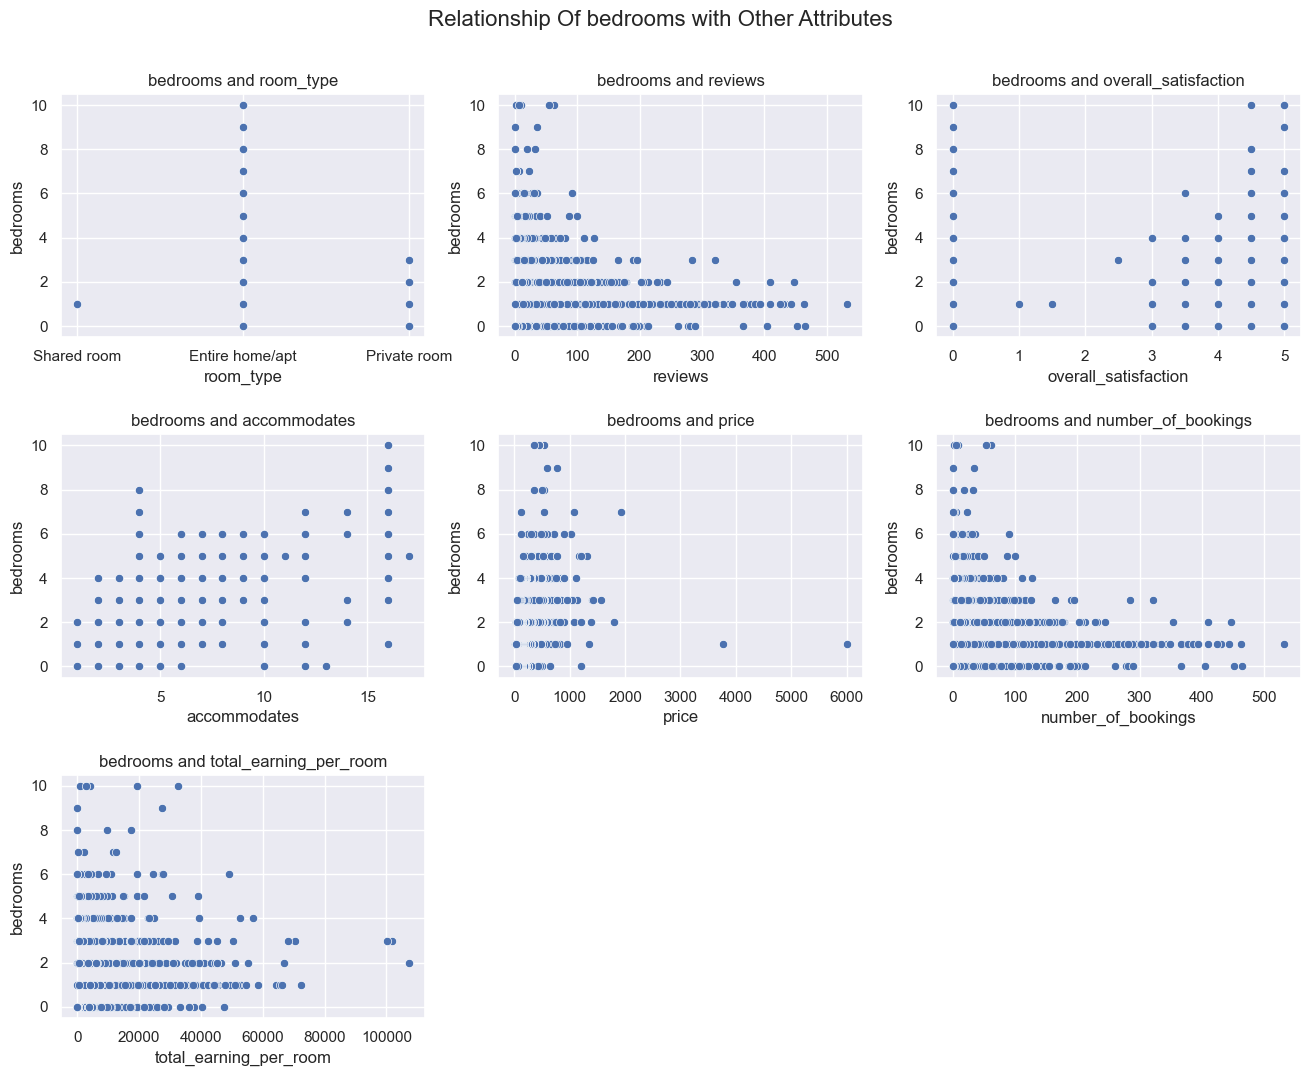

In [52]:
# bedrooms column relationship with other attributes

bivariate_analysis('bedrooms',data=data,)

# Correaltion of bedrooms with other Attributes
print("Correlation of bedrooms with other attributes :\n")
print(data.corr().loc['bedrooms'].drop(['bedrooms']))

#### Conclusion:
#### 1. Entire home/apartment rooms can have more number of bedrooms.
#### 2. More number of bedrooms increases with more of bedrooms.Customer with more accommodates choose room with more bedrooms.
#### 3. More number of bedrooms increases the price of the rooms.

In [53]:
# Description of the other attributes with the given column bedrooms by calling function
groupby_description('bedrooms',data=data)

reviews                                                       \
            count       mean        std  min   25%   50%    75%    max   
bedrooms                                                                 
0.0        1154.0  22.194107  42.500125  0.0  2.00   8.0  23.00  465.0   
1.0       11101.0  19.449509  37.636355  0.0  2.00   8.0  20.00  532.0   
2.0        4456.0  12.123429  22.447685  0.0  1.00   5.0  14.00  447.0   
3.0        1444.0   9.071330  19.356016  0.0  0.00   3.0  10.00  321.0   
4.0         473.0   7.452431  12.666951  0.0  0.00   3.0  10.00  127.0   
5.0          62.0  11.629032  18.151669  0.0  2.25   6.0  13.75  100.0   
6.0          19.0  16.473684  21.603416  0.0  2.50   9.0  21.50   91.0   
7.0           4.0   8.000000  10.230673  1.0  1.75   4.0  10.25   23.0   
8.0           3.0  17.000000  16.093477  0.0  9.50  19.0  25.50   32.0   
9.0           2.0  17.500000  24.748737  0.0  8.75  17.5  26.25   35.0   
10.0          5.0  26.600000  28.910206  2.0  6.00   9.0  54.00   62.0   

         overall_satisfaction                                              \
                        count      mean       std  min   25%   50%    75%   
bedrooms                                                                    
0.0                    1154.0  3.317591  2.174390  0.0  0.00  4.50  5.000   
1.0                   11101.0  3.454644  2.142868  0.0  0.00  4.50  5.000   
2.0                    4456.0  3.178972  2.264424  0.0  0.00  4.50  5.000   
3.0                    1444.0  2.686981  2.391877  0.0  0.00  4.50  5.000   
4.0                     473.0  2.644820  2.387658  0.0  0.00  4.50  5.000   
5.0                      62.0  3.604839  2.154175  0.0  1.00  5.00  5.000   
6.0                      19.0  3.447368  2.146669  0.0  1.75  4.50  5.000   
7.0                       4.0  2.375000  2.750000  0.0  0.00  2.25  4.625   
8.0                       3.0  3.000000  2.598076  0.0  2.25  4.50  4.500   
9.0                       2.0  2.500000  3.535534  0.0  1.25  2.50  3.750   
10.0                      5.0  3.900000  2.190890  0.0  4.50  5.00  5.000   

              accommodates                                                     \
          max        count       mean       std   min   25%   50%   75%   max   
bedrooms                                                                        
0.0       5.0       1154.0   2.328423  0.886698   1.0   2.0   2.0   2.0  13.0   
1.0       5.0      11101.0   2.270336  0.764748   1.0   2.0   2.0   2.0  16.0   
2.0       5.0       4456.0   3.797127  0.823968   1.0   4.0   4.0   4.0  14.0   
3.0       5.0       1444.0   4.530471  1.089119   2.0   4.0   4.0   5.0  16.0   
4.0       5.0        473.0   5.414376  1.651131   2.0   4.0   5.0   6.0  16.0   
5.0       5.0         62.0   7.000000  2.857260   4.0   5.0   6.0   8.0  17.0   
6.0       5.0         19.0   8.842105  3.745563   4.0   6.0   8.0  11.0  16.0   
7.0       5.0          4.0  11.500000  5.259911   4.0  10.0  13.0  14.5  16.0   
8.0       4.5          3.0  12.000000  6.928203   4.0  10.0  16.0  16.0  16.0   
9.0       5.0          2.0  16.000000  0.000000  16.0  16.0  16.0  16.0  16.0   
10.0      5.0          5.0  16.000000  0.000000  16.0  16.0  16.0  16.0  16.0   

            price                                                         \
            count        mean         std    min     25%    50%      75%   
bedrooms                                                                   
0.0        1154.0  131.536395   60.961385   29.0   99.25  119.0   150.00   
1.0       11101.0  135.482929   88.015807   12.0   96.00  119.0   156.00   
2.0        4456.0  203.321589   93.078363   24.0  144.00  180.0   240.00   
3.0        1444.0  255.014543  137.789697   41.0  179.00  222.0   300.00   
4.0         473.0  302.268499  148.053908   84.0  193.00  270.0   359.00   
5.0          62.0  451.677419  255.588025  161.0  282.00  414.0   510.00   
6.0          19.0  503.000000  228.383449  119.0  329.50  540.0   562.50   

#### Description : Above data shows of number of bedrooms availabel in the room with the description like mean,count,min,max etc of other attributes. 

In [54]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of price with other attributes :

reviews                  -0.084516
overall_satisfaction     -0.044775
accommodates              0.500350
bedrooms                  0.446144
number_of_bookings       -0.084516
total_earning_per_room    0.144266
Name: price, dtype: float64


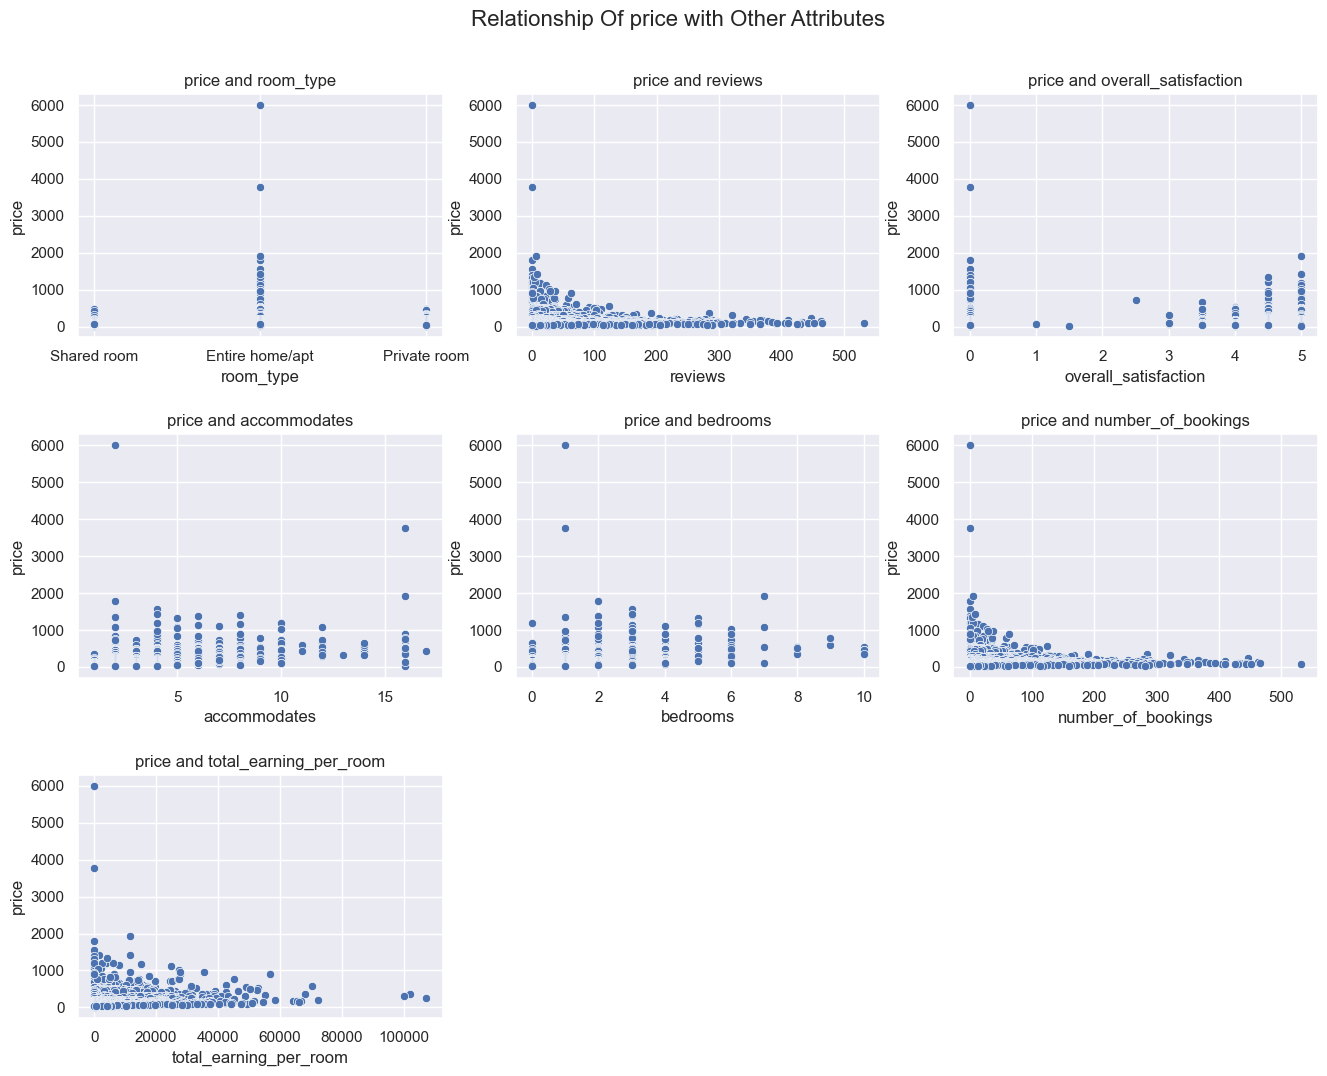

In [55]:
# price column relationship with other attributes

bivariate_analysis('price',data=data,)

# Correaltion of price with other Attributes
print("Correlation of price with other attributes :\n")
print(data.corr().loc['price'].drop(['price']))

#### Conclusion :
#### 1. Prices goes higher for home/apartment than others.
#### 2. Prices of the rooms goes up with number of accommodates and number of bedrooms.
#### 3. Between 0 to 2000 is the range of price of the rooms which receives most of the bookings.

In [56]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of number_of_bookings with other attributes :

reviews                   1.000000
overall_satisfaction      0.316705
accommodates             -0.061360
bedrooms                 -0.114641
price                    -0.084516
total_earning_per_room    0.851140
Name: number_of_bookings, dtype: float64


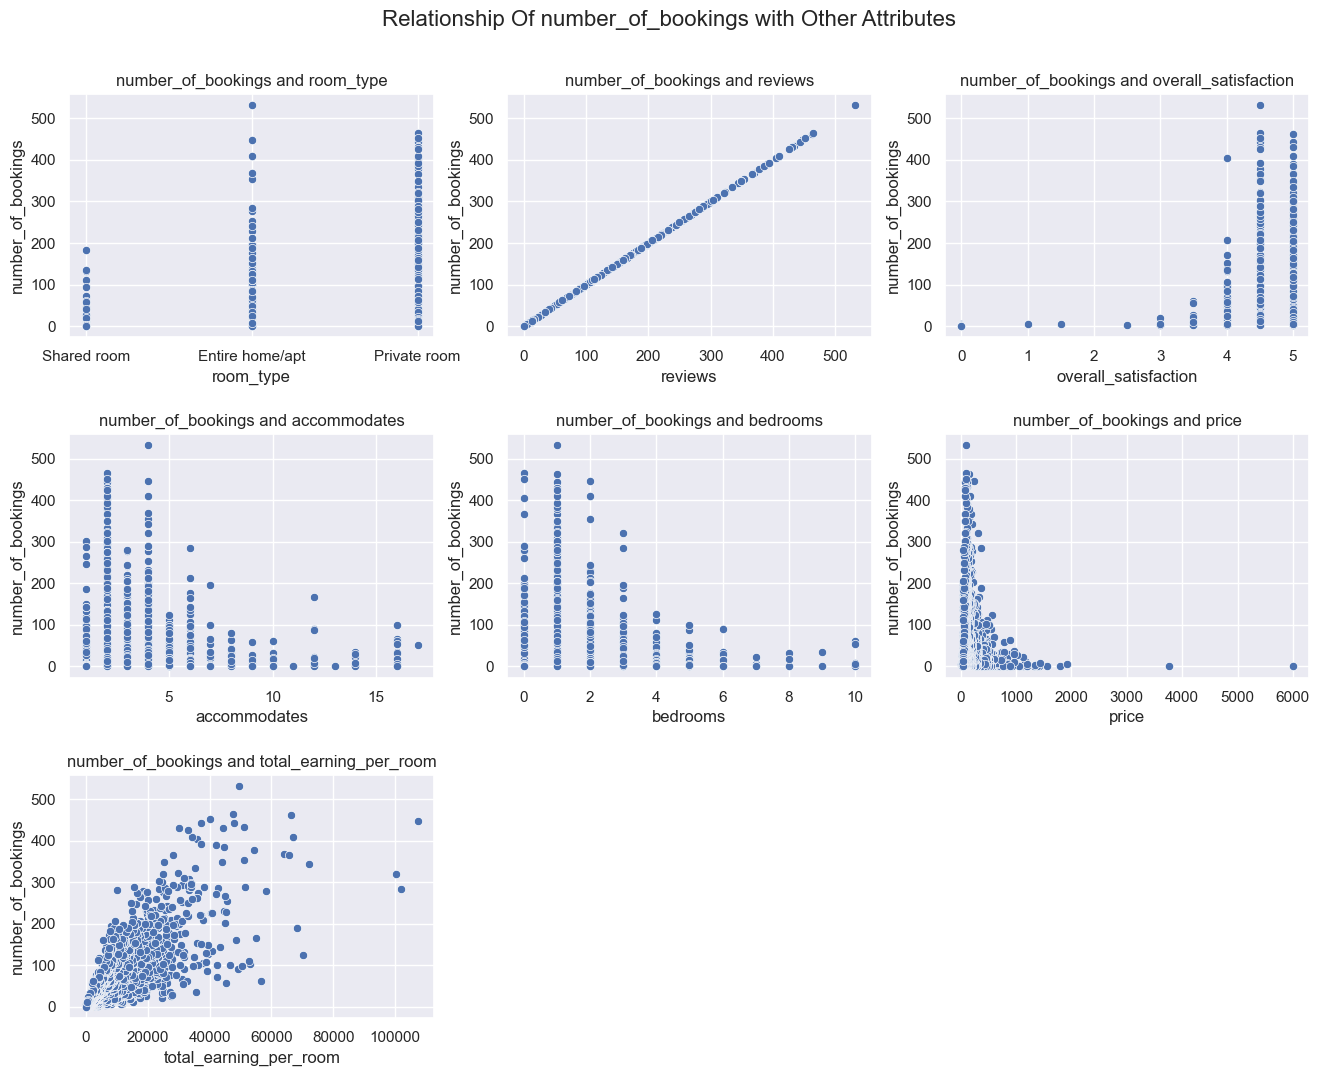

In [57]:
# number_of_bookings column relationship with other attributes

bivariate_analysis('number_of_bookings',data=data,)

# Correaltion of number_of_bookings with other Attributes
print("Correlation of number_of_bookings with other attributes :\n")
print(data.corr().loc['number_of_bookings'].drop(['number_of_bookings']))

#### Conclusion :
#### 1. Higher the Number of bookings if overall_satisfaction ratings given by the customers is higher.
#### 2. Higher bookings for less number of accommodates and less number of bedrooms.
#### 3. Almost number of bookings lies in the price of room range of 0 to 2000.
#### 4. number of booking increases the total money earned by the room.

In [58]:
data.columns

Index(['room_type', 'reviews', 'overall_satisfaction', 'accommodates',
       'bedrooms', 'price', 'number_of_bookings', 'total_earning_per_room'],
      dtype='object')

Correlation of total_earning_per_room with other attributes :

reviews                 0.851140
overall_satisfaction    0.328279
accommodates            0.112062
bedrooms                0.025753
price                   0.144266
number_of_bookings      0.851140
Name: total_earning_per_room, dtype: float64


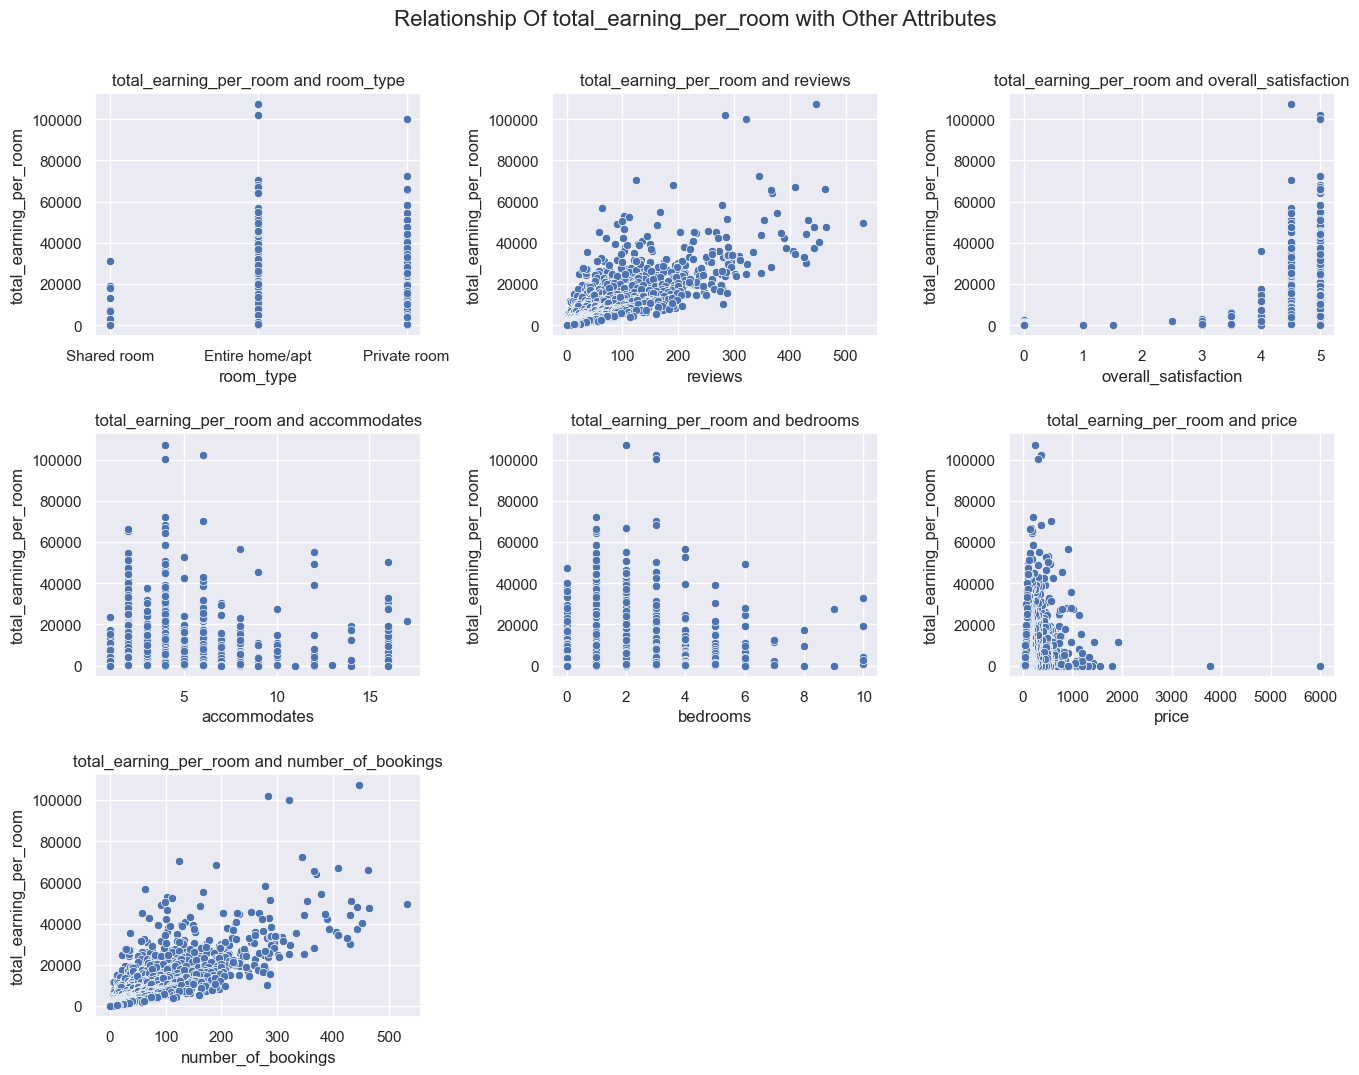

In [59]:
# total_earning_per_room column relationship with other attributes

bivariate_analysis('total_earning_per_room',data=data,wspace=0.4)

# Correaltion of total_earning_per_room with other Attributes
print("Correlation of total_earning_per_room with other attributes :\n")
print(data.corr().loc['total_earning_per_room'].drop(['total_earning_per_room']))

#### Conclusion:
#### 1. Total earning of the room is higher on home apartment and private rooms.
#### 2. Total earning of the rooms is higher of the room having high rating like 4.5 and 5.
#### 3. Total earning of the rooms is higher of the room whose price range is between 0 to 2000.
#### 4. Total earning of the room increases with increase in the number of bookings.

In [60]:
df.columns

Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price', 'name',
       'last_modified', 'latitude', 'longitude', 'location',
       'number_of_bookings', 'total_earning', 'month', 'monthly_earning',
       'total_earning_per_room'],
      dtype='object')

In [61]:
bivariate_analysis

<function __main__.bivariate_analysis(column, data: pandas.core.frame.DataFrame, hspace=0.4, wspace=0.2)>

In [62]:
# ??? neighborhood with price,room_type,overall_satisfaction,number_of_bookings,total_earning_per_room

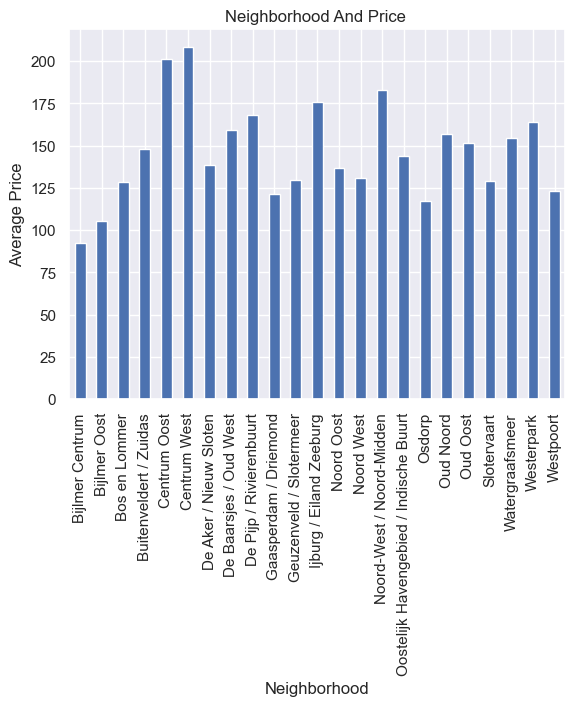

In [63]:
## Neighborhood relationship with price
df.groupby(by=['neighborhood'])['price'].mean().plot(kind='bar')
plt.title("Neighborhood And Price ")
plt.xticks(rotation='vertical');
plt.ylabel('Average Price');
plt.xlabel('Neighborhood')
plt.show()

#### Conclusion : Above graph show the average price according to the area. We can many draw insights like :-
#### 1. centrum west has higher average price.
#### 2. Bijlmer centrum area has lesser average price means room are cheaper here.

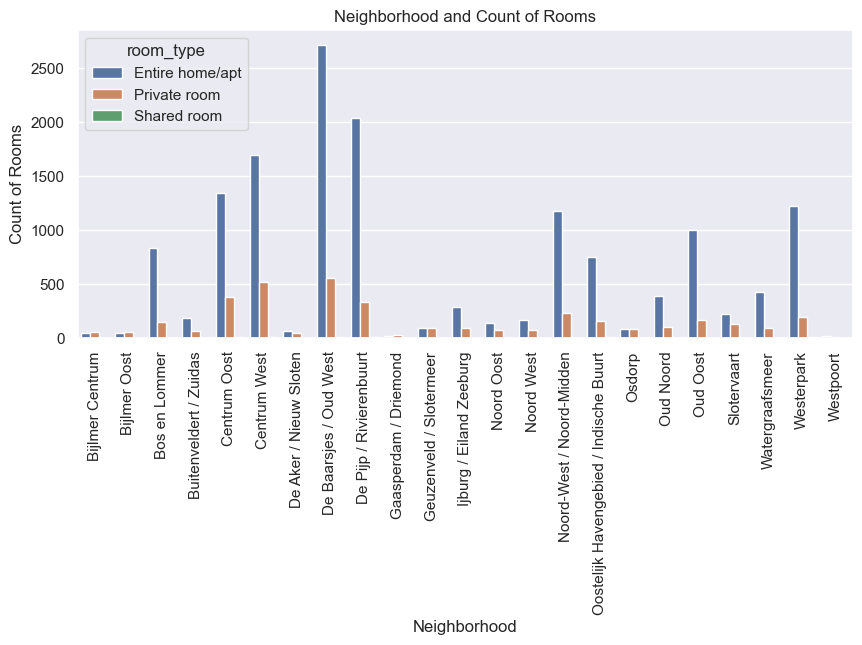

In [64]:
## This shows the count of rooms in according to neighborhood
grp_data = df.groupby(['neighborhood','room_type'])['room_id'].count().reset_index()

plt.figure(figsize = (10,4))
sns.barplot(x=grp_data['neighborhood'],y=grp_data['room_id'],hue=grp_data['room_type'])
plt.title('Neighborhood and Count of Rooms')
plt.xticks(rotation='vertical')
plt.ylabel('Count of Rooms')
plt.xlabel('Neighborhood')
plt.show()

#### Remarks : Above graph show the the count of rooms according to room type present in different neighborhood

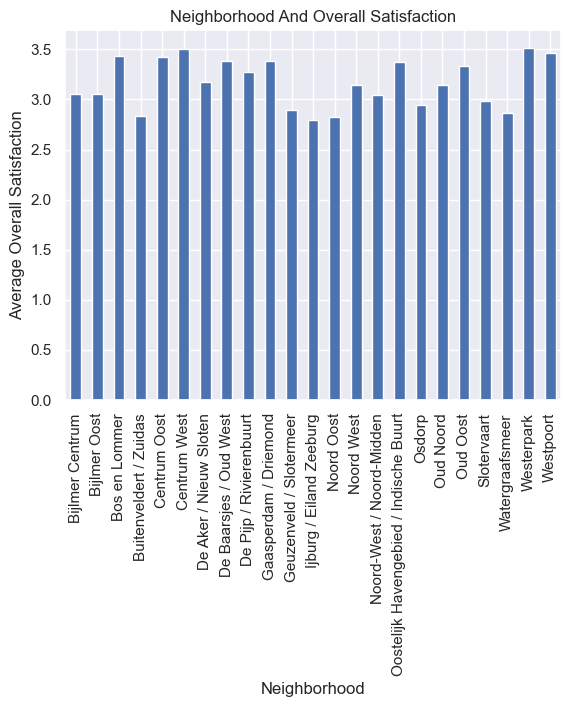

In [65]:
# Relationship between neighborhood and overall_satisfaction
df.groupby(['neighborhood'])['overall_satisfaction'].mean().plot(kind='bar')
plt.title('Neighborhood And Overall Satisfaction')
plt.xlabel('Neighborhood')
plt.ylabel('Average Overall Satisfaction');
plt.show()

#### Remarks : Above plot show the average overall satisfaction rate neighborhood wise.

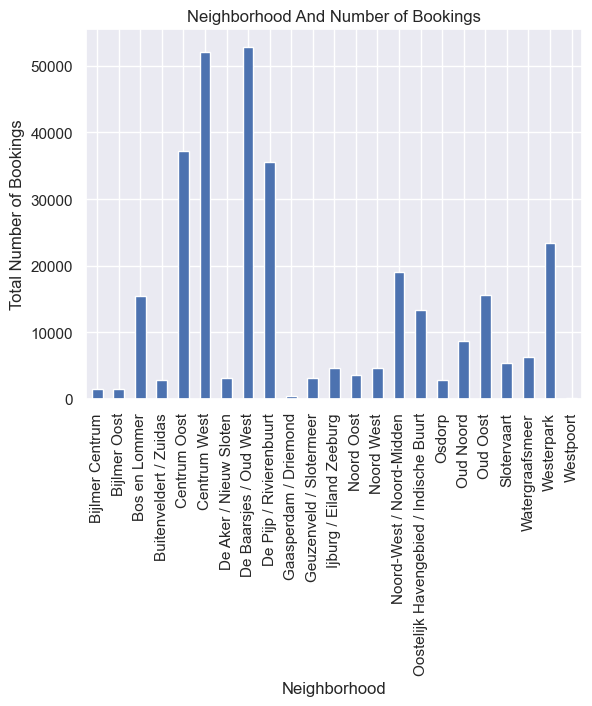

In [66]:
# Relationship between neighborhood and number of bookings
df.groupby(['neighborhood'])['number_of_bookings'].sum().plot(kind='bar')
plt.title('Neighborhood And Number of Bookings')
plt.ylabel('Total Number of Bookings')
plt.xlabel('Neighborhood')
plt.show()

#### Conclusion : 
#### 1. Centrum west and De Pijp received highest number of bookings.
#### 2. Bijlmer Centrum and Bijlmer Oost received least number of bookings.

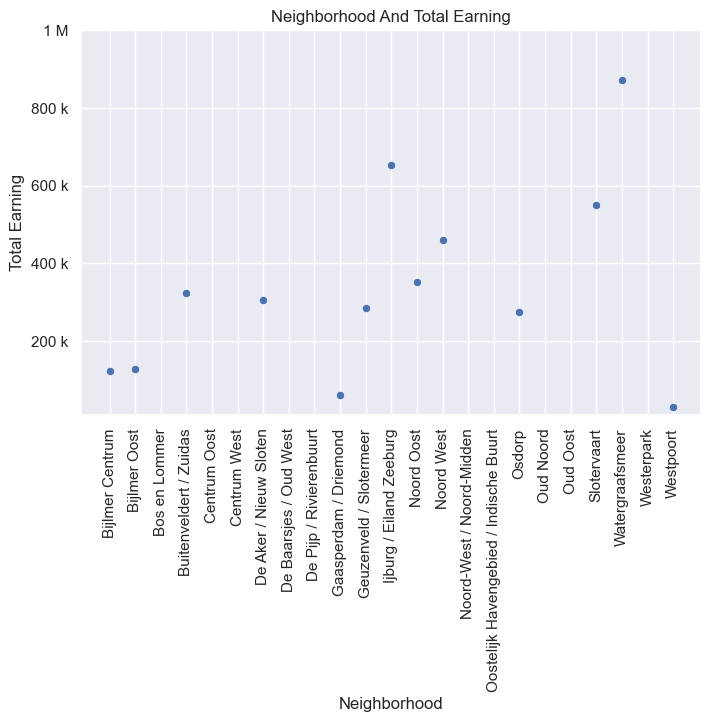

In [67]:
## Relationship of neighborhood with total earning 

from matplotlib import ticker
grp_data = df.groupby(['neighborhood'])['total_earning_per_room'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(ax=ax,x=grp_data['neighborhood'],y=grp_data['total_earning_per_room'],data=grp_data)
plt.title('Neighborhood And Total Earning')
plt.xlabel("Neighborhood")
plt.ylabel("Total Earning")
plt.xticks(rotation='vertical');

ax.set_ylim((10000,1000000))
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#### Remarks : Above plot shows the total earning made by each neighborhood.

### Multivariate Analysis

In [68]:
grp_data['total_earning_per_room'].max()

9125102.0

In [69]:
df.head(5)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location,number_of_bookings,total_earning,month,monthly_earning,total_earning_per_room
0,10176931,49180562,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...,7,1092.0,7,1092.0,1092.0
1,8935871,46718394,Shared room,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...,45,5670.0,7,5670.0,5670.0
2,14011697,10346595,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...,1,132.0,7,132.0,132.0
3,6137978,8685430,Shared room,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...,7,847.0,7,847.0,847.0
4,18630616,70191803,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...,1,93.0,7,93.0,93.0


(0.0, 800.0)

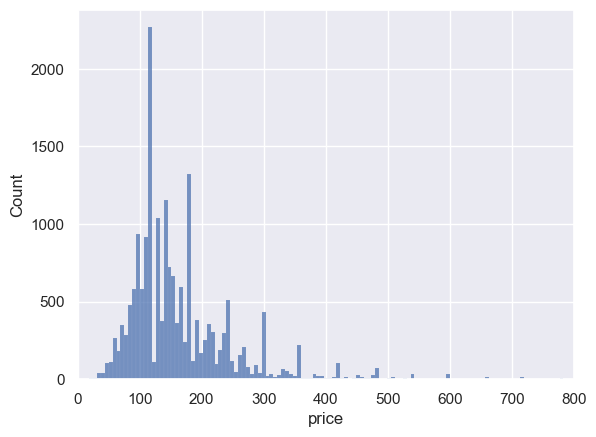

In [100]:
sns.histplot(df['price'])
plt.xlim(0,800)

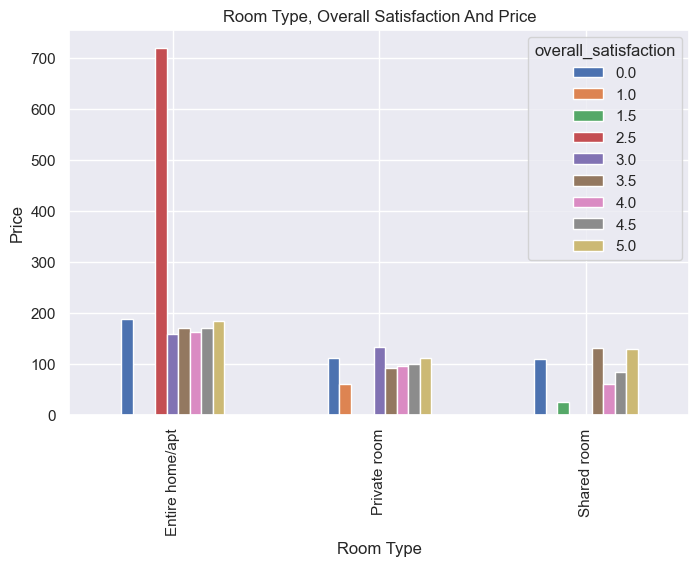

In [70]:
# Relationship between room_type, overall_satisfaction and price
fig,ax = plt.subplots(figsize=(8,5))
df.groupby(['room_type','overall_satisfaction'])['price'].mean().unstack().plot(ax=ax,kind='bar')
ax.set_title('Room Type, Overall Satisfaction And Price')
ax.set_xlabel('Room Type')
ax.set_ylabel("Price")
plt.show()

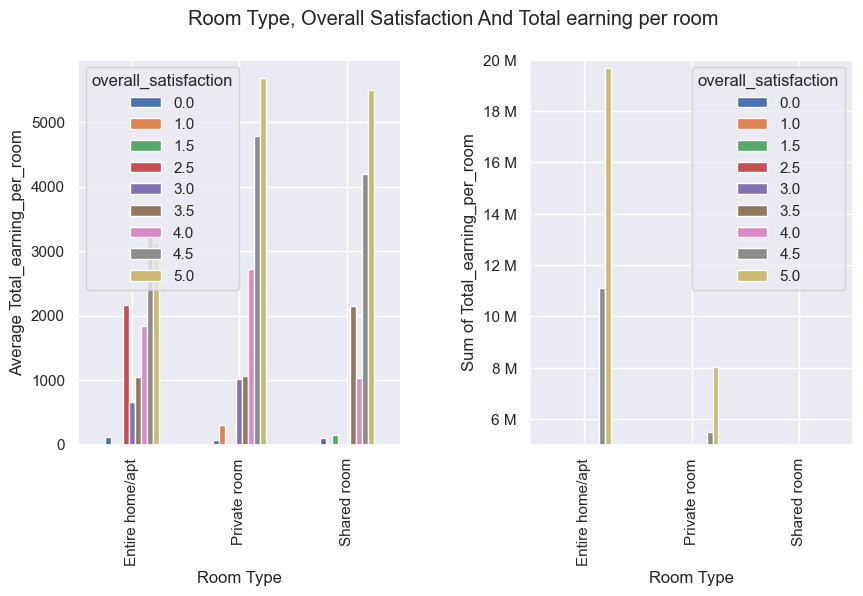

In [87]:
# Relationship between room_type, overall_satisfaction and price
fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.4)
plt.suptitle('Room Type, Overall Satisfaction And Total earning per room')

df.groupby(['room_type','overall_satisfaction'])['total_earning_per_room'].mean().unstack().plot(ax=ax[0],kind='bar')
ax[0].set_xlabel('Room Type')
ax[0].set_ylabel("Average Total_earning_per_room")

df.groupby(['room_type','overall_satisfaction'])['total_earning_per_room'].sum().unstack().plot(ax=ax[1],kind='bar')
ax[1].set_xlabel('Room Type')
ax[1].set_ylabel("Sum of Total_earning_per_room")
ax[1].set_ylim((5000000,20000000))
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

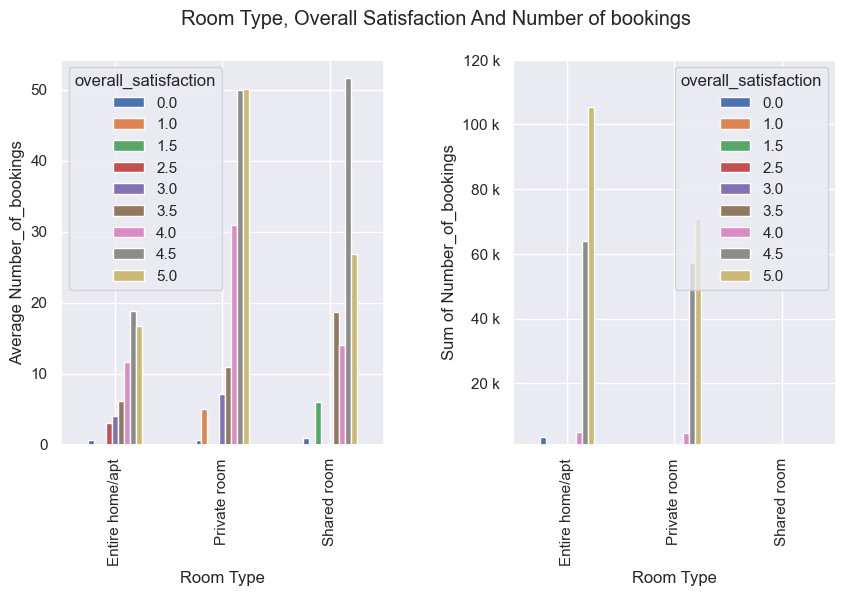

In [95]:
# Relationship between room_type, overall_satisfaction and price
fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.4)
plt.suptitle('Room Type, Overall Satisfaction And Number of bookings')
df.groupby(['room_type','overall_satisfaction'])['number_of_bookings'].mean().unstack().plot(ax=ax[0],kind='bar')
ax[0].set_xlabel('Room Type')
ax[0].set_ylabel("Average Number_of_bookings")


df.groupby(['room_type','overall_satisfaction'])['number_of_bookings'].sum().unstack().plot(ax=ax[1],kind='bar')
ax[1].set_xlabel('Room Type')
ax[1].set_ylabel("Sum of Number_of_bookings")
ax[1].set_ylim(1000,120000)
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

<ipython-input-104-3166141c378a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['neighborhood','room_type'])['price','total_earning_per_room'].mean().unstack().plot(ax=ax,kind='bar')


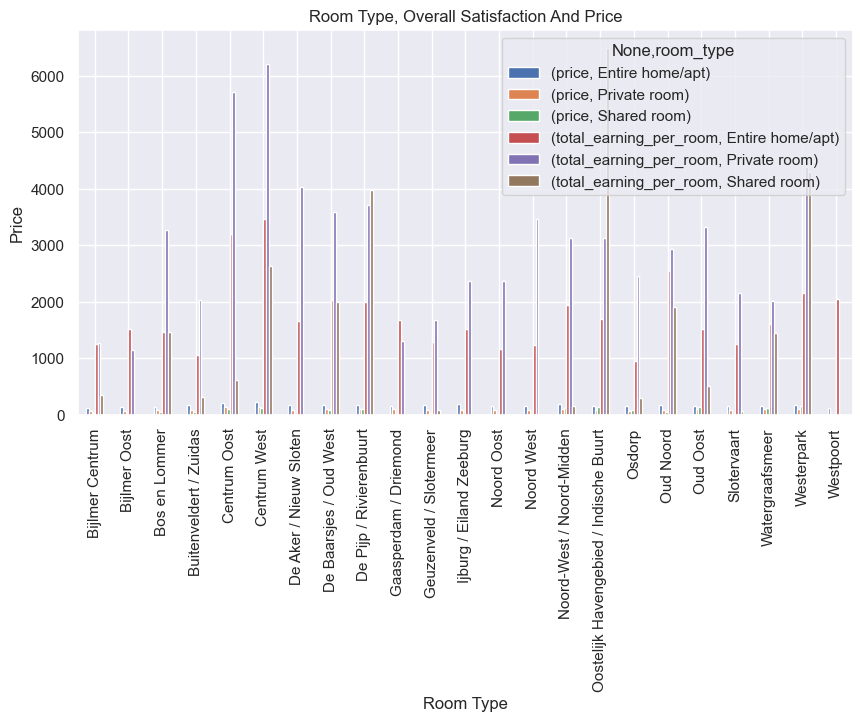

In [104]:
# Relationship between room_type, overall_satisfaction and price
fig,ax = plt.subplots(figsize=(10,5))
df.groupby(['neighborhood','room_type'])['price'].mean().unstack().plot(ax=ax,kind='bar')
ax.set_title('Room Type, Overall Satisfaction And Price')
ax.set_xlabel('Room Type')
ax.set_ylabel("Price")
plt.show()

In [116]:
df['number_of_bookings'].max()

532

In [117]:
def create_booking_bins(rev):
    if rev > 500:
        return "greater than 500"
    elif rev > 400:
        return "400 - 500"
    elif rev > 300:
        return "300 - 400"
    elif rev > 200:
        return "200 - 300"
    elif rev > 100:
        return "100 - 200"
    else:
        return "0 - 100"

In [119]:
df['bookings_bins'] = df['number_of_bookings'].apply(create_booking_bins)

In [120]:
gd = df.groupby(['room_type','neighborhood','bookings_bins'])['total_earning_per_room'].sum().reset_index()
gd

,room_type,neighborhood,bookings_bins,total_earning_per_room
0,Entire home/apt,Bijlmer Centrum,0 - 100,47046.0
1,Entire home/apt,Bijlmer Centrum,100 - 200,7920.0
2,Entire home/apt,Bijlmer Oost,0 - 100,56679.0
3,Entire home/apt,Bijlmer Oost,100 - 200,11918.0
4,Entire home/apt,Bos en Lommer,0 - 100,1131347.0
...,...,...,...,...
139,Shared room,Oud Oost,0 - 100,1011.0
140,Shared room,Slotervaart,0 - 100,216.0
141,Shared room,Watergraafsmeer,0 - 100,2886.0
142,Shared room,Westerpark,0 - 100,7816.0


In [124]:
sns.catplot(x=gd['neighborhood'],y=gd['total_earning_per_room'],hue=gd['bookings_bins'],col=gd['room_type'],data=gd)

KeyError: "None of [Index(['Entire home/apt', 'Entire home/apt', 'Entire home/apt',\n       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',\n       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',\n       'Entire home/apt',\n       ...\n       'Shared room', 'Shared room', 'Shared room', 'Shared room',\n       'Shared room', 'Shared room', 'Shared room', 'Shared room',\n       'Shared room', 'Shared room'],\n      dtype='object', length=144)] are in the [columns]"

In [ ]:
#plt.scatter(x=df['number_of_bookings'],y=df['total_earning_per_room'],c=df['room_type'],s=df['price'])

In [ ]:
# ? Which neighborhood room earns more 
df.groupby(['neighborhood','room_type'])['total_earning_per_room'].sum().sort_values(ascending=False).head(5).plot()
plt.xticks(rotation='vertical');

In [ ]:
sns.scatterplot(x=df['neighborhood'],y=df['total_earning_per_room'],hue=df['room_type'])
plt.xticks(rotation='vertical');

In [ ]:
? How sum of number of bookings for each room type in each neighborhood
df.groupby(['neighborhood','room_type'])['number_of_bookings'].sum().sort_values(ascending=False).head()

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df['neighborhood'],y=df['number_of_bookings'],hue=df['room_type'])
plt.xticks(rotation='vertical');

In [ ]:
nqualityprice = df.groupby(['neighborhood'])['overall_satisfaction','price'].mean().sort_values(by='overall_satisfaction',ascending=False).head()
sns.barplot(x=list(nqualityprice.index.values),y=nqualityprice['price'],hue=nqualityprice['overall_satisfaction'])


In [ ]:
list(nqualityprice.index.values)

In [ ]:
sns.scatterplot(x = df['neighborhood'], y = df['price'],hue=df['overall_satisfaction'])
plt.xticks(rotation='vertical');

In [ ]:
sns.set_palette('dark')
sns.scatterplot(x=df['reviews'],y=df['price'],hue=df['overall_satisfaction'])

In [ ]:
# Relationship between overall_satisfaction, price and room_type
sns.set_palette('dark')
sns.scatterplot(x=df['room_type'],y=df['price'],hue=df['overall_satisfaction'])

In [ ]:
df.head(3)

In [ ]:
sns.scatterplot(x=df['price'],y=df['total_earning_per_room'],hue=df['overall_satisfaction'])

In [ ]:

Entire_home_apt = df[df['room_type']=='Entire home/apt'] 
Private_room = df[df['room_type']== 'Private room']
Shared_room = df[df['room_type']== 'Shared room']

df_room_type =[Entire_home_apt,Private_room,Shared_room]


# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("Entire home apartment bookings,average price and overall satisfaction")
sns.barplot(x=Entire_home_apt['number_of_bookings'],y=Entire_home_apt['price'],data=Entire_home_apt,hue=Entire_home_apt['overall_satisfaction'])
plt.xlabel("Entire Home Apartment Bookings")
plt.ylabel("average price")
plt.legend(loc='right')
plt.show()


# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("Private Room bookings,average price and overall satisfaction")
sns.barplot(x=Private_room['number_of_bookings'],y=Private_room['price'],data=Private_room,hue=Private_room['overall_satisfaction'])
plt.xlabel("Private Room Bookings")
plt.ylabel("average price")
plt.legend(loc='right')
plt.show()

# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("Shared Room bookings,average price and overall satisfaction")
sns.barplot(x=Shared_room['number_of_bookings'],y=Shared_room['price'],data=Shared_room,hue=Shared_room['overall_satisfaction'])
plt.xlabel("Shared Room Bookings")
plt.ylabel("average price")
plt.legend(loc='right')
plt.show()

In [ ]:
Relationship Between Total Earning Per Room, Price and Number Of Bookings

In [ ]:
# ? Total Earning per room and it's price and it's number of times bookings

# Assumption:- Number of reviews is taking as number of times room has been booked, so creating new column booTking
def create_booking_bins(rev):
    if rev > 500:
        return "greater than 500"
    elif rev > 400:
        return "400 - 500"
    elif rev > 300:
        return "300 - 400"
    elif rev > 200:
        return "200 - 300"
    elif rev > 100:
        return "100 - 200"
    else:
        return "0 - 100"

# Creating new column
df3['bookings']  = df3['reviews'].apply(func=create_booking_bins)

# Total_Earning_per_roomid
df3['total_earning_per_roomid'] = df3['reviews'] * df3['price']

# Ploting graph of total_earning_per_roomid vs price and number of booking made to the room
plt.figure(figsize=(8,6))
plt.title("Relationship Between Total Earning Per Room, Price and bookings")
sns.scatterplot(x=df3['total_earning_per_roomid'],y=df3['price'],hue=df3['bookings'],data=df3)
plt.xlabel("total earning per room")
plt.ylabel("price")
plt.show()

# Correlation between total_earning_per_roomid and price
print("\nCorrelation between total_earning_per_room and price : ", df3['total_earning_per_roomid'].corr(df3['price'],method='pearson'))

# Correlation between total_earning_per_roomid and it's price and number of bookings
print("\nCorrelation between total_earning_per_room and it's number of bookings : ", df3['total_earning_per_roomid'].corr(df3['reviews'],method='pearson'))

In [ ]:
df3.head(3)

In [ ]:
df3.groupby(['overall_satisfaction'])['reviews'].mean().plot(kind="bar")
#sns.scatterplot(x=df3['overall_satisfaction'],y=df3['reviews'],hue=df3['room_type'])

df3['reviews'].corr(df3['overall_satisfaction'])

In [ ]:
sns.color_palette("dark")
sns.scatterplot(x=df3['overall_satisfaction'],y=df3['reviews'],hue=df3['room_type'],)

In [ ]:
Price Variation by Room Type:

Analyze the average price for each room type (e.g., Private room, Shared room, Entire home/apt) and 
identify any significant variations. This can help in understanding the pricing dynamics and preferences of 
guests based on the type of accommodation.

In [ ]:
df3.room_type.value_counts()

In [ ]:
# Grouping room_type and it's price
room_type_price = df3.groupby(['room_type'])['price'].mean()

# Relationship between Room Type and it's Price
plt.figure(figsize=(6,4))
plt.title("Relationship Between Room Type and Average Price")
room_type_price.plot(kind='barh')
plt.xlabel("Price")
plt.ylabel("Room Type")
plt.show()


In [ ]:
#  Relationship between Quality and Price
# Taking number of overall_satisfaction as parameter of quality, grouping overall_satisfaction with mean of price.
quality_price = df3.groupby(['overall_satisfaction'])['price'].mean()

# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("quality vs average price")
sns.barplot(x=df3['overall_satisfaction'],y=df3['price'],data=df3,hue=df['room_type'])
plt.xlabel("Quality")
plt.ylabel("average price")
plt.show()

# Correlation between overall_satisfaction and average price
print("\nCorrelation between overall_satisfaction and price : ", df3['overall_satisfaction'].corr(df3['price'],method='pearson'))

In [ ]:
Shared_room

In [ ]:
df3.room_type.value_counts()

In [ ]:
Zero_booking_df = df3[df3['reviews'] == 0]

In [ ]:
# Grouping room_type and it's price 
room_type_price = df3.groupby(['room_type'])['price'].mean()

print(df3.room_type.value_counts().to_frame())
# Relationship between Room Type and it's Price and also with number of booking each has.
plt.figure(figsize=(8,6))
plt.title("Relationship Between Room Type and Average Price and number of bookings")
sns.barplot(x=df3['room_type'],y=df3['price'],hue=df3['bookings'],data=df3)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


In [ ]:
# Grouping room_type and it's price 
room_type_price = df3.groupby(['room_type'])['price'].mean()

print(df3.room_type.value_counts().to_frame())
# Relationship between Room Type and it's Price and also with number of booking each has.
plt.figure(figsize=(8,6))
plt.title("Relationship Between Room Type and Average Price and overall satisfaction")
sns.barplot(x=df3['room_type'],y=df3['price'],hue=df3['overall_satisfaction'],data=df3)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()


In [ ]:
Zero_booking_df.room_type.value_counts()

In [ ]:
df['booking_status'] = df3['']

In [ ]:
brs = df3[df3['reviews'] > 0]
brs.groupby(['neighborhood','room_type'])['reviews'].sum()

In [ ]:
nrr = df3[df3['reviews'] < 5]
nrr.groupby(['neighborhood','room_type'])['reviews'].value_counts()

#sns.barplot(xnrr['room_type'],y=value_c.values,hue=Zero_booking_df['neighborhood'])
##plt.show()

In [ ]:
Entire_home_apt_Z = Zero_booking_df[Zero_booking_df['room_type']=='Entire home/apt'] 
Private_room_Z = Zero_booking_df[Zero_booking_df['room_type']== 'Private room']
Shared_room_Z = Zero_booking_df[Zero_booking_df['room_type']== 'Shared room']

df_room_type =[Entire_home_apt,Private_room,Shared_room]


# Relationship with neighborhood vs price
plt.figure(figsize=(8,6))
plt.title("Entire home apartment bookings,average price and overall satisfaction")
sns.barplot(x=Entire_home_apt_Z['neighborhood'],y=Entire_home_apt_Z['price'],data=Entire_home_apt_Z,hue=Entire_home_apt_Z['overall_satisfaction'])
plt.xlabel("Entire Home Apartment Bookings")
plt.ylabel("average price")
plt.legend(loc='right')
plt.show()



In [ ]:
df3.head(5)

In [ ]:
# Obj - For each neighborhood let's compare their each room type with their average price
#plt.figure(figsize=(10,8))
g = df.groupby(['neighborhood','room_type'])['price'].mean().reset_index()
sns.barplot(x=g['neighborhood'],y= g['price'],hue=g['room_type'])
plt.xticks(rotation='vertical');


In [ ]:
# count
sns.countplot(x=df3['neighborhood'],hue=df3['room_type'])
plt.xticks(rotation='90')
plt.legend(loc='upper right')
#df3.groupby(['neighborhood'])['room_type'].value_counts()

In [ ]:
# count
sns.countplot(y=df3['overall_satisfaction'],hue=df3['room_type'])
plt.xticks(rotation='90')
df3.groupby(['neighborhood'])['room_type'].value_counts()

In [ ]:
# count
sns.countplot(y=df3['neighborhood'],hue=df3['room_type'])
plt.xticks(rotation='90')

In [ ]:
Price Distribution Analysis:

Examine the distribution of prices across the dataset. Calculate descriptive statistics such as mean, median, 
and standard deviation to understand the typical price range and variability. 
This analysis can help in setting competitive pricing strategies and identifying any outliers in the dataset

In [ ]:
df3['price'].describe()

In [ ]:
df3.groupby(['room_type'])['price'].describe()

In [ ]:
df3.groupby(['neighborhood','room_type'])['price'].describe()

In [ ]:
plt.figure(figsize=(14,16))
df.groupby(['neighborhood','room_type','overall_satisfaction'])['price'].describe().plot()
plt.xticks(rotation='vertical');

In [ ]:
df3.groupby(['neighborhood','room_type','overall_satisfaction','bedrooms'])['price'].describe()

In [ ]:
df3['activestatus'] = np.where(df3['reviews'] > 0,True,False)

In [ ]:
sns.countplot(x=df3.neighborhood,hue=df3.activestatus)
plt.xticks(rotation='90')

In [ ]:
# comparision between activestatus true and false according to neighborhood and room_type
df3.groupby(['neighborhood','room_type'])['activestatus'].value_counts()

In [ ]:
df3.name.head(20)

In [ ]:
df3